# NBA Archetypes

## Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

# Specific imports for scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, silhouette_score, f1_score
from sklearn.manifold import TSNE

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)  # Corrected to use 'matplotlib' instead of 'plt'
print("Seaborn version:", sns.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("SciPy version:", scipy.__version__)

NumPy version: 2.1.3
Pandas version: 2.2.3
Matplotlib version: 3.9.2
Seaborn version: 0.13.2
Scikit-learn version: 1.5.2
SciPy version: 1.14.1


## Load Data

In [36]:
import pandas as pd

def load_data(file_name, local_path, server_path, encoding='utf-8', sep=','):
    try:
        data = pd.read_csv(local_path + file_name, encoding=encoding, sep=sep)
        print(f"'{file_name}' file successfully read from the local path.")

    except (FileNotFoundError, UnicodeDecodeError):
        try:
            data = pd.read_csv(server_path + file_name, encoding=encoding, sep=sep)
            print(f"'{file_name}' file successfully read from the server path.")

        except FileNotFoundError:
            print(f"'{file_name}' file not found. Please check the file paths.")
            data = None

        except UnicodeDecodeError:
            print(f"Encoding error encountered while reading '{file_name}' from the server path.")
            data = None
            
    return data

file_name = '2023-2024 NBA Player Stats - Regular.csv'
local_path = r'C:\Users\betak\NBA-Archetypes\datasets\\'  # Windows path (raw string with backslashes)
server_path = '/datasets/'  # This will remain the same if it's the same on the server

df = load_data(file_name, local_path, server_path, encoding='ISO-8859-1', sep=';')

'2023-2024 NBA Player Stats - Regular.csv' file successfully read from the local path.


## Data Preprocessing

In [37]:
# Analyze function
def analyze(data):
    # Display the DataFrame
    display(data)

    # Print DataFrame Info
    print("DATAFRAME INFO:")
    df.info()
    print()

    # Calculate Percentage of Null Values
    print("PERCENTAGE OF NULL VALUES:")
    print((df.isnull().sum()/len(data)) * 100)
    print()

    # Calculate Number of Duplicated Rows
    print("NUMBER OF DUPLICATED ROWS:", data.duplicated().sum())

In [42]:
analyze(df)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
5,3,Ochai Agbaji,SG,23,UTA,51,10,19.7,2.1,4.9,...,0.750,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,568,Thaddeus Young,PF,35,TOT,33,6,13.3,2.0,3.3,...,0.400,1.4,1.7,3.1,1.7,0.7,0.2,0.5,1.5,4.2
729,568,Thaddeus Young,PF,35,TOR,23,6,15.2,2.3,3.8,...,0.417,1.3,2.0,3.3,2.2,0.8,0.1,0.5,1.7,5.0
730,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 0 to 733
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      709 non-null    int64  
 1   Player  709 non-null    object 
 2   Pos     709 non-null    object 
 3   Age     709 non-null    int64  
 4   Tm      709 non-null    object 
 5   G       709 non-null    int64  
 6   GS      709 non-null    int64  
 7   MP      709 non-null    float64
 8   FG      709 non-null    float64
 9   FGA     709 non-null    float64
 10  FG%     709 non-null    float64
 11  3P      709 non-null    float64
 12  3PA     709 non-null    float64
 13  3P%     709 non-null    float64
 14  2P      709 non-null    float64
 15  2PA     709 non-null    float64
 16  2P%     709 non-null    float64
 17  eFG%    709 non-null    float64
 18  FT      709 non-null    float64
 19  FTA     709 non-null    float64
 20  FT%     709 non-null    float64
 21  ORB     709 non-null    floa

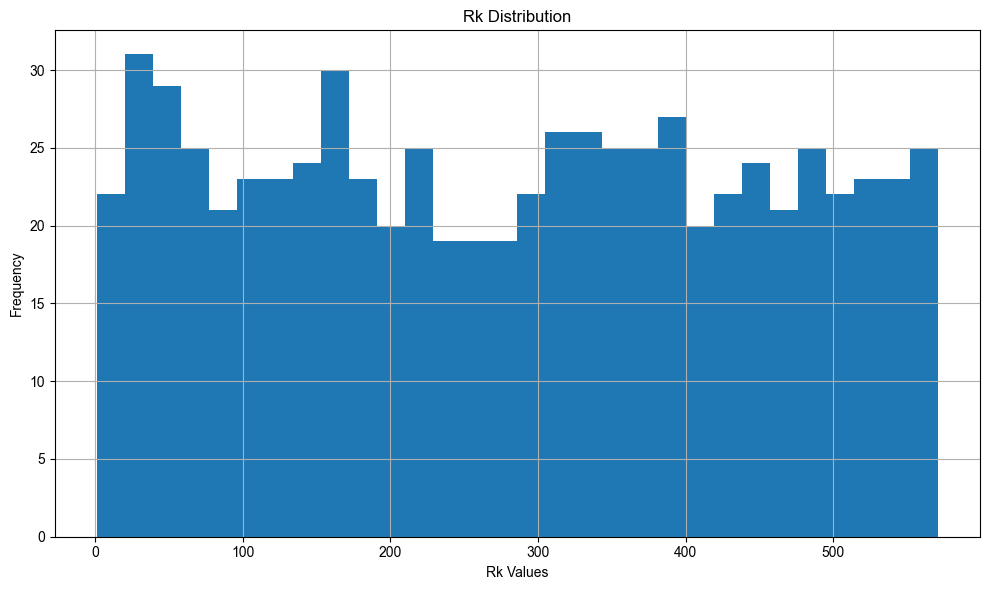

C:\Users\betak\AppData\Local\Temp\ipykernel_17852\1207657288.py:8: UserWarning: Glyph 154 (\x9a) missing from font(s) Arial.
  plt.tight_layout()  # Adjust layout for better appearance
C:\Users\betak\AppData\Local\Temp\ipykernel_17852\1207657288.py:8: UserWarning: Glyph 138 (\x8a) missing from font(s) Arial.
  plt.tight_layout()  # Adjust layout for better appearance


<Figure size 640x480 with 0 Axes>

c:\Users\betak\NBA-Archetypes\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 154 (\x9a) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\betak\NBA-Archetypes\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 138 (\x8a) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


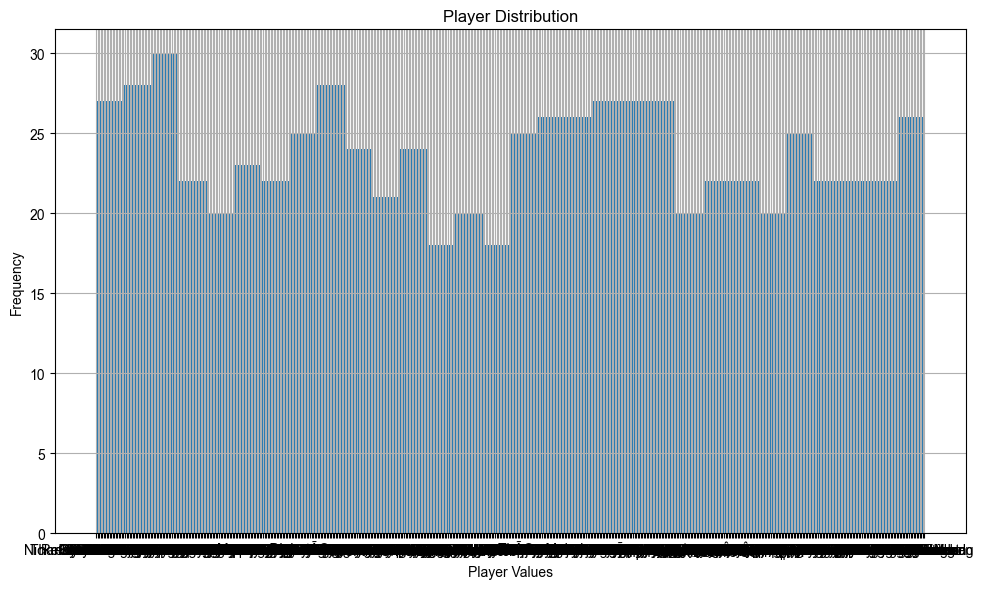

<Figure size 640x480 with 0 Axes>

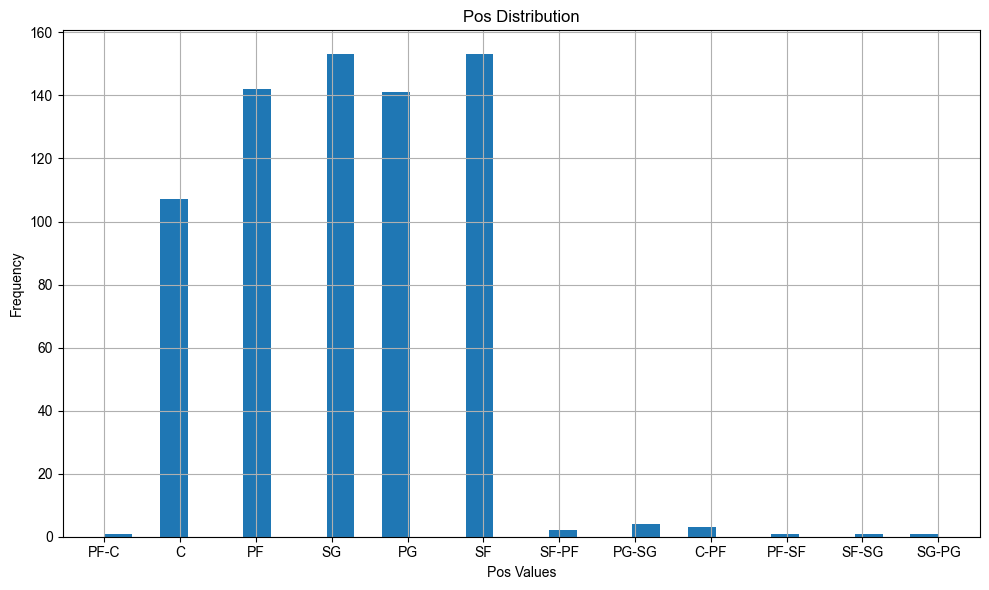

<Figure size 640x480 with 0 Axes>

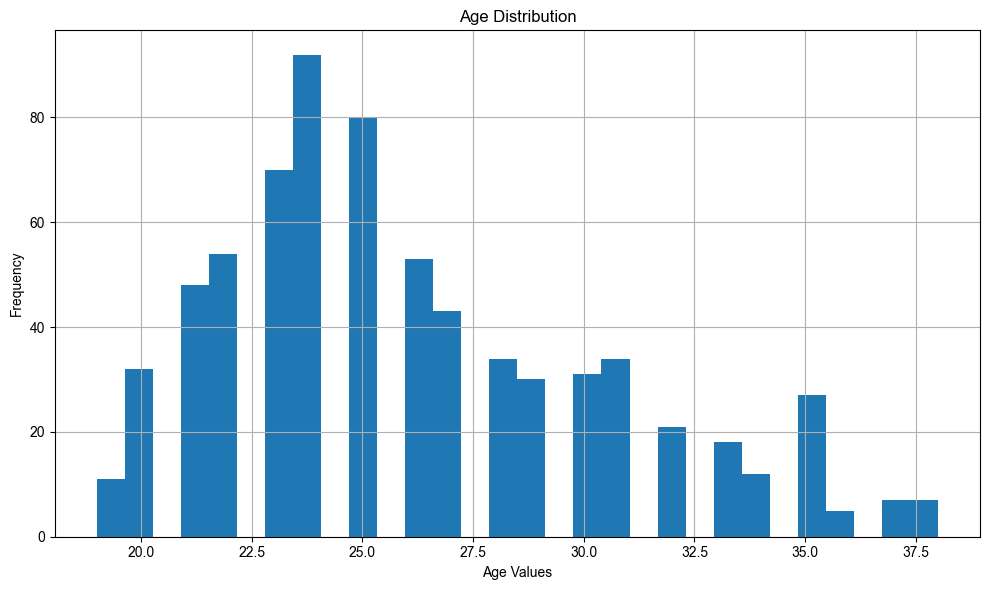

<Figure size 640x480 with 0 Axes>

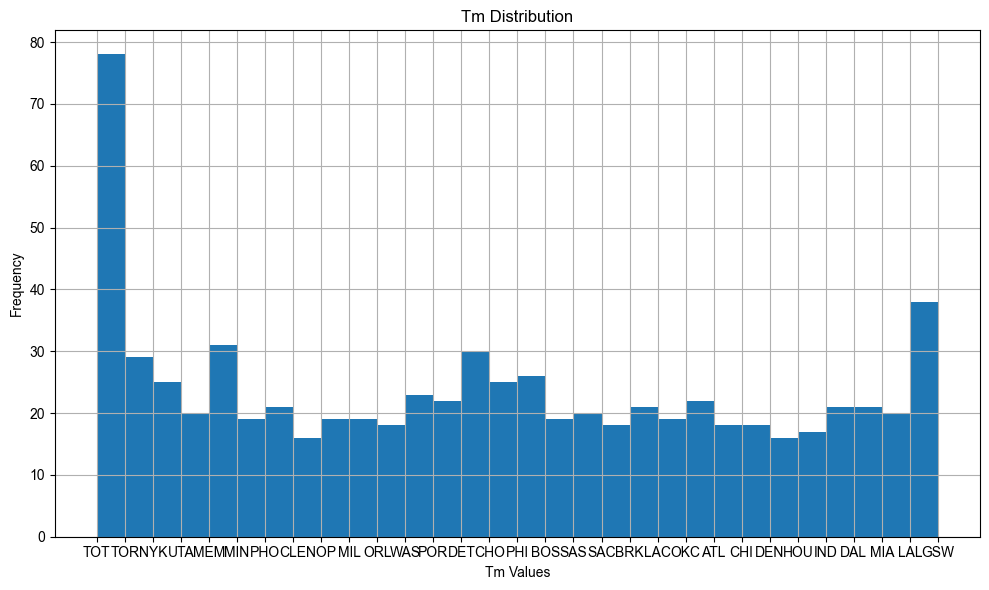

<Figure size 640x480 with 0 Axes>

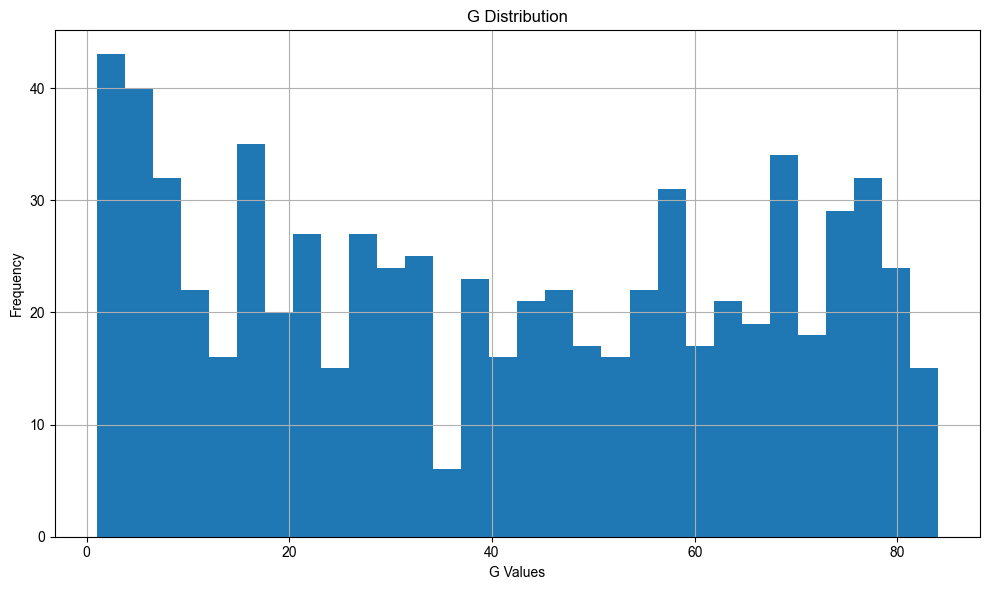

<Figure size 640x480 with 0 Axes>

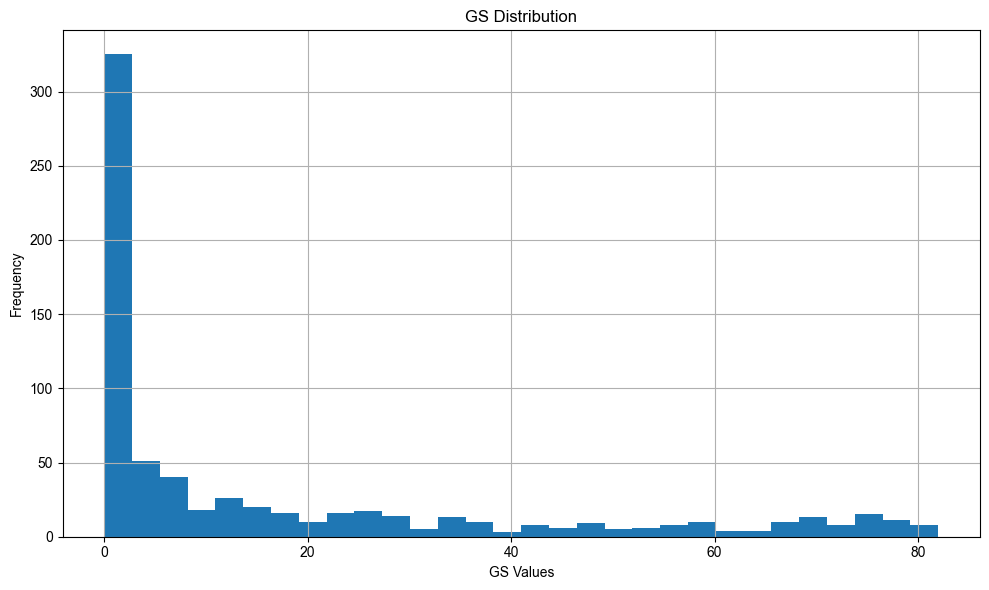

<Figure size 640x480 with 0 Axes>

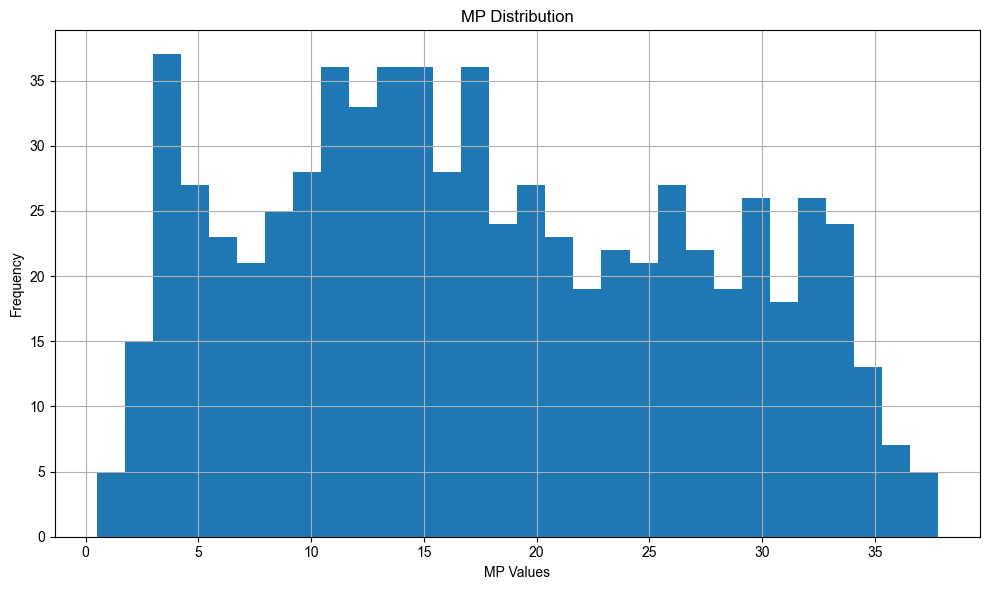

<Figure size 640x480 with 0 Axes>

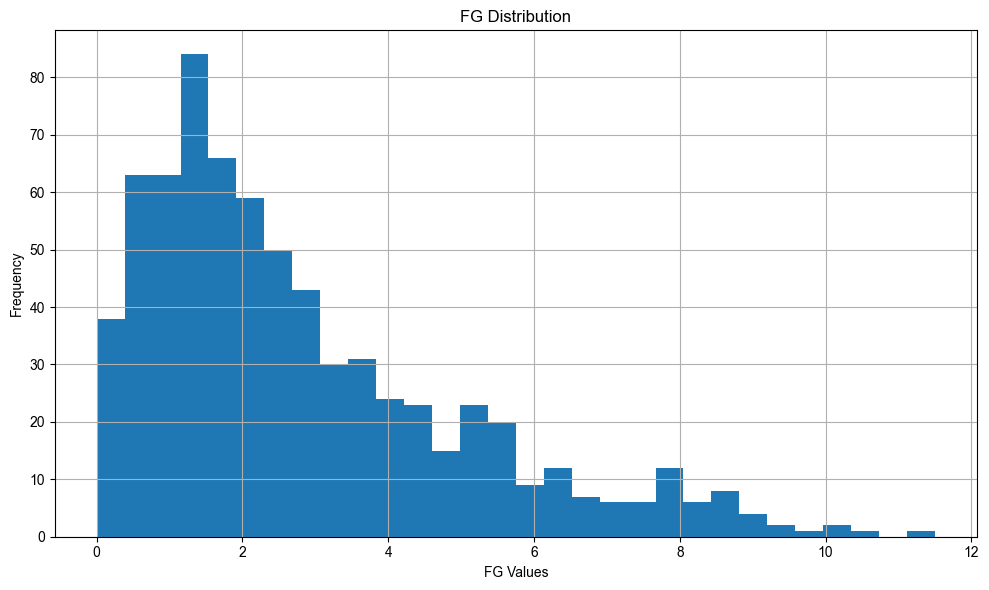

<Figure size 640x480 with 0 Axes>

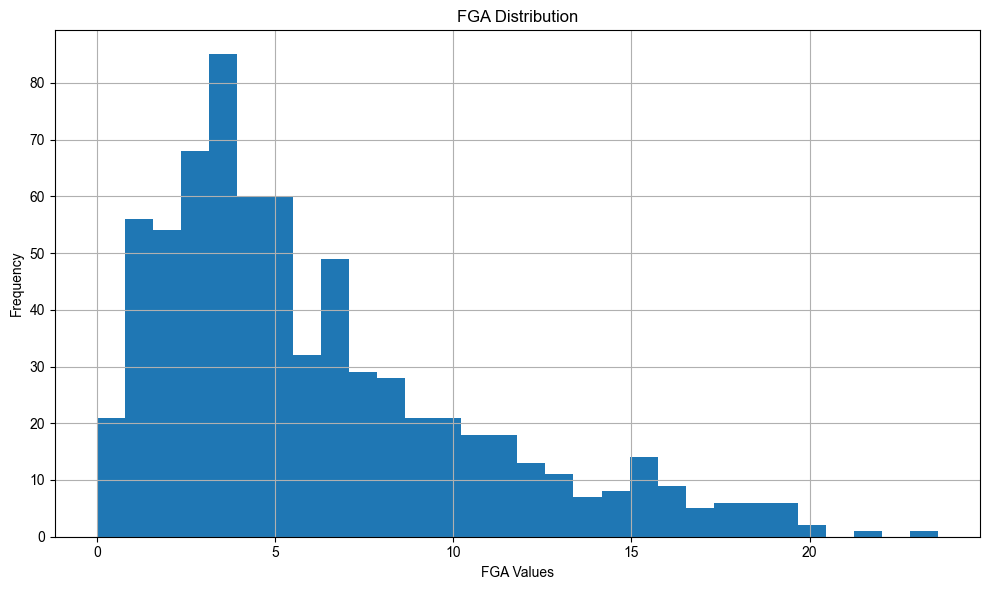

<Figure size 640x480 with 0 Axes>

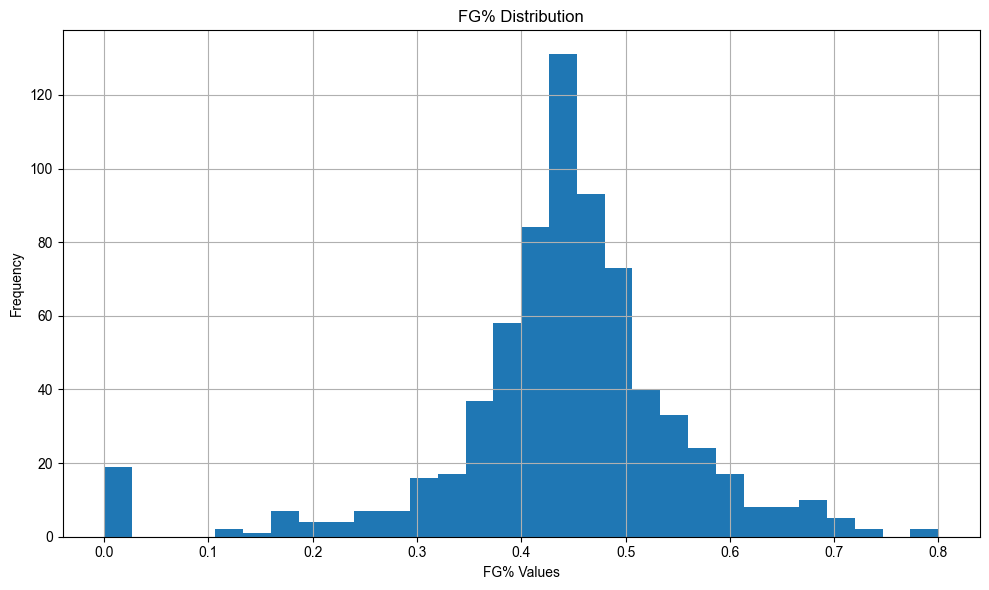

<Figure size 640x480 with 0 Axes>

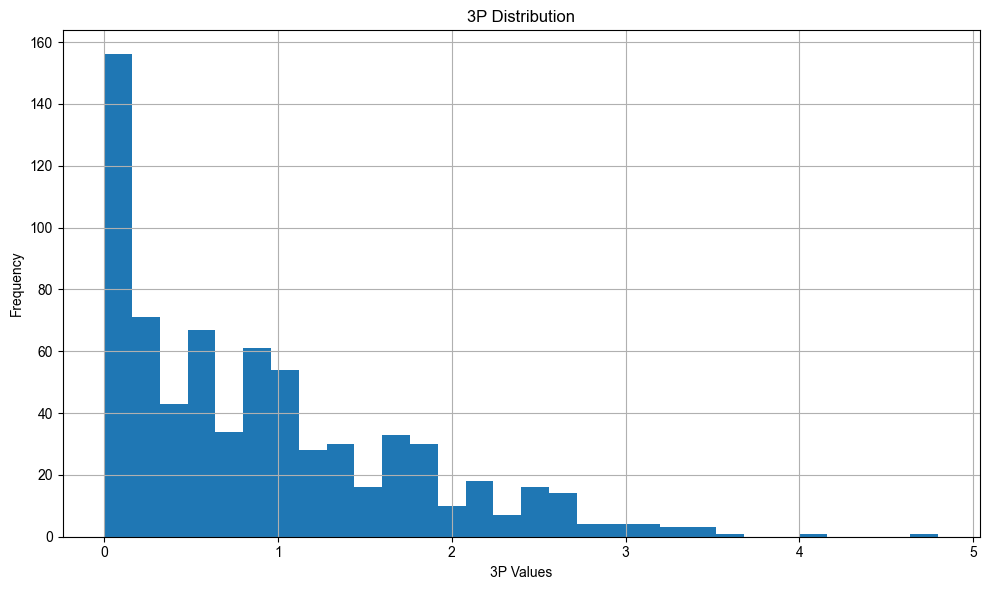

<Figure size 640x480 with 0 Axes>

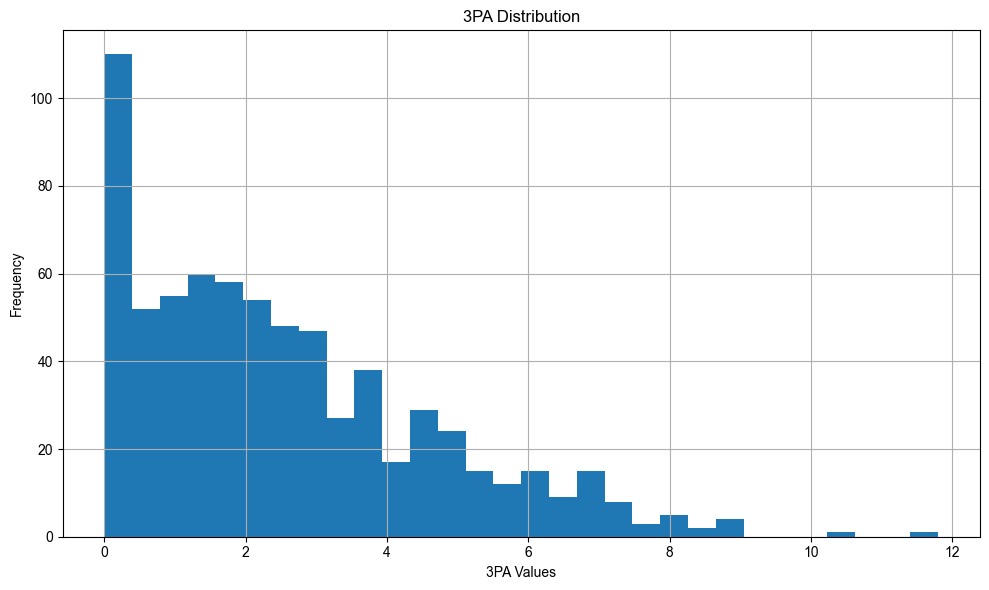

<Figure size 640x480 with 0 Axes>

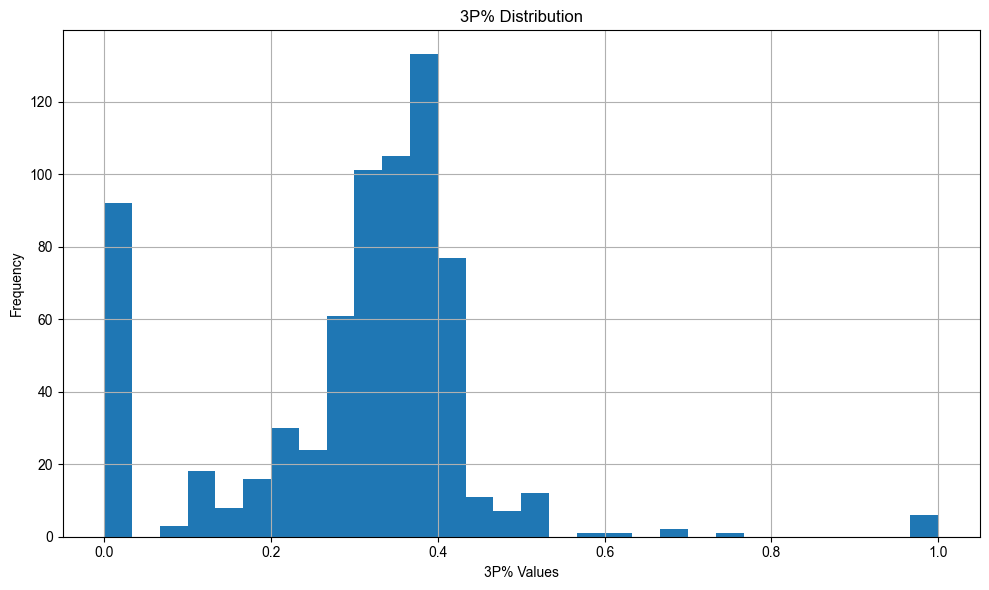

<Figure size 640x480 with 0 Axes>

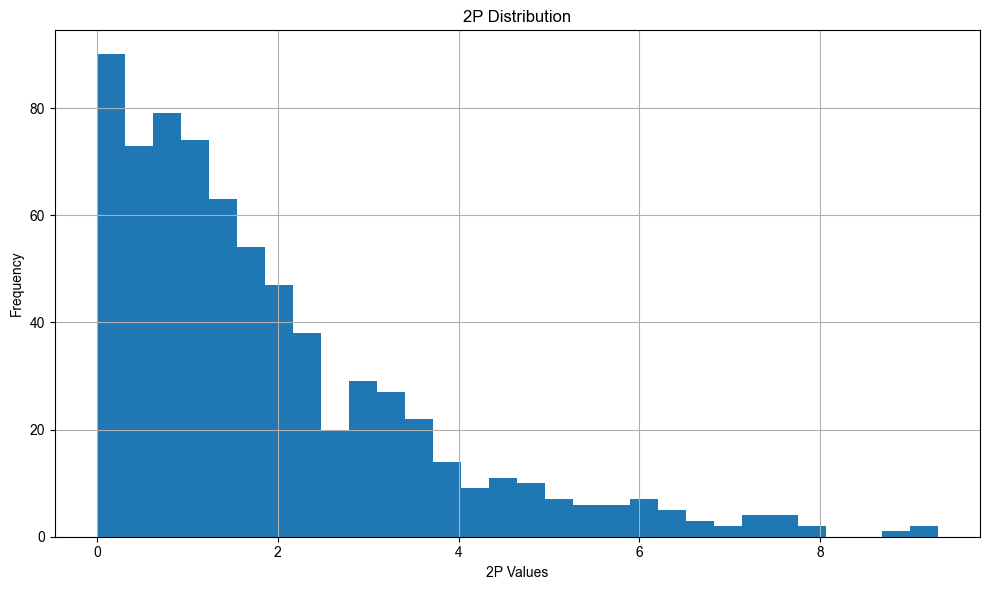

<Figure size 640x480 with 0 Axes>

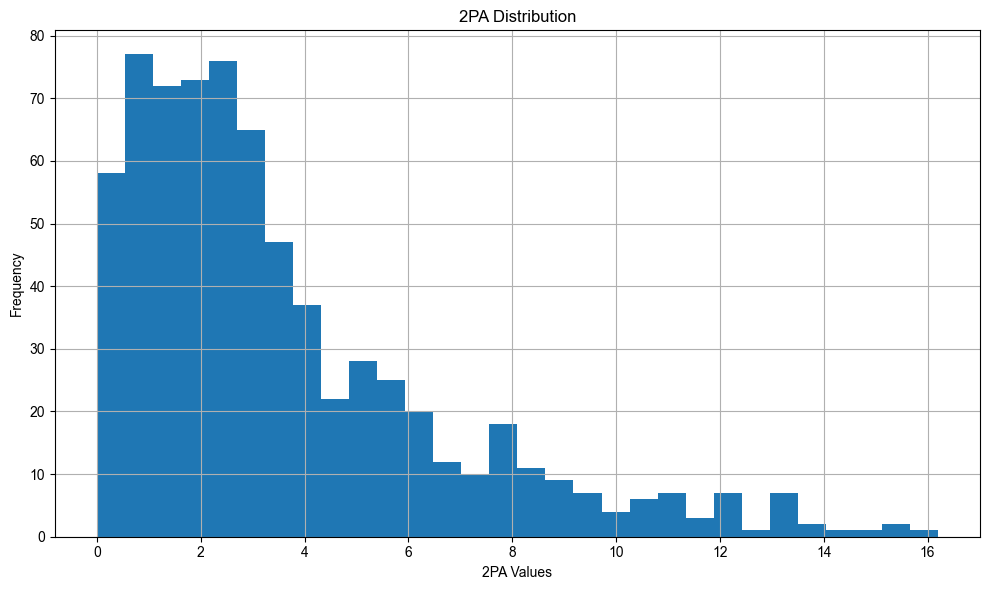

<Figure size 640x480 with 0 Axes>

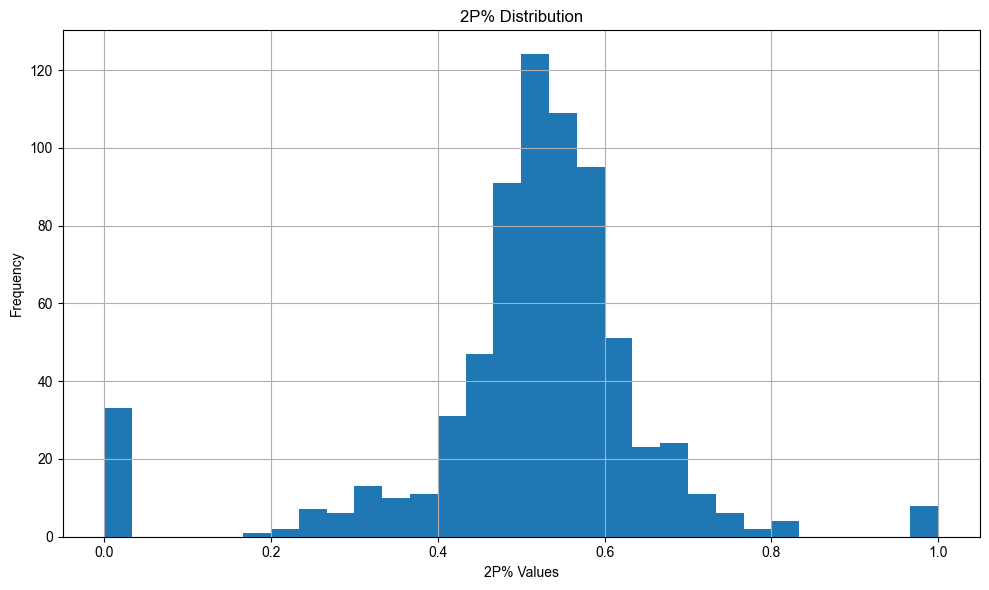

<Figure size 640x480 with 0 Axes>

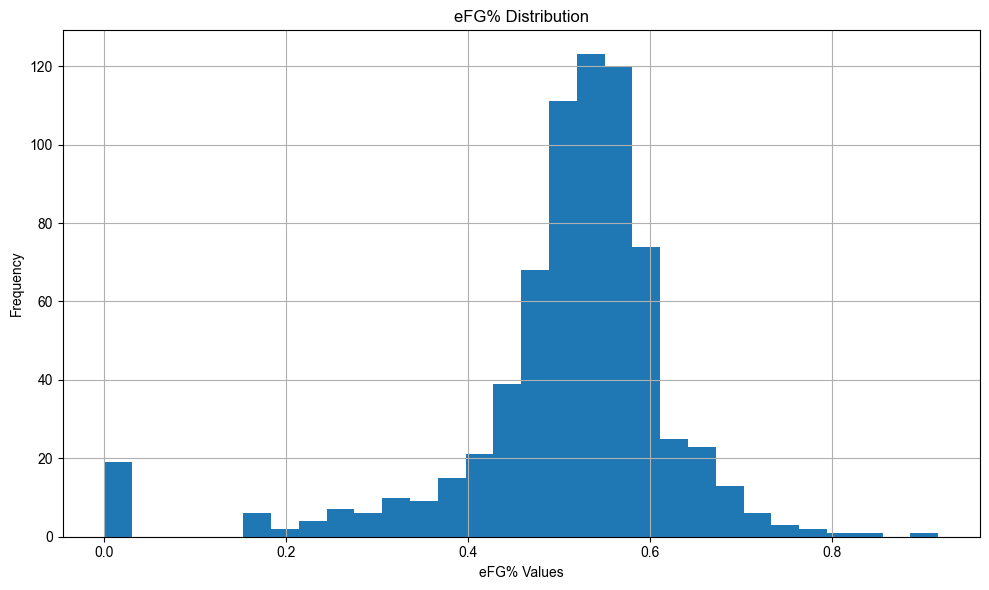

<Figure size 640x480 with 0 Axes>

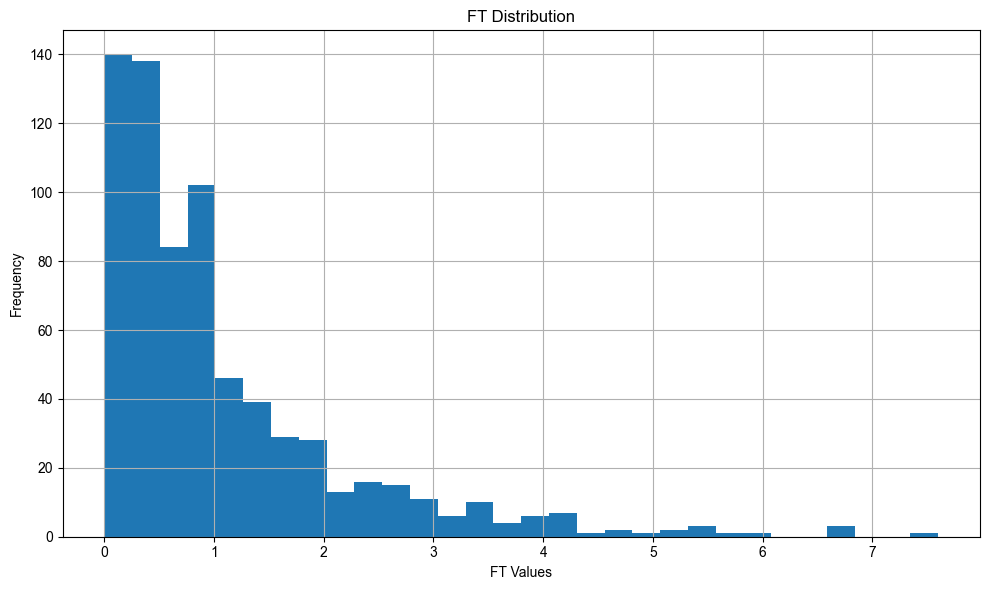

<Figure size 640x480 with 0 Axes>

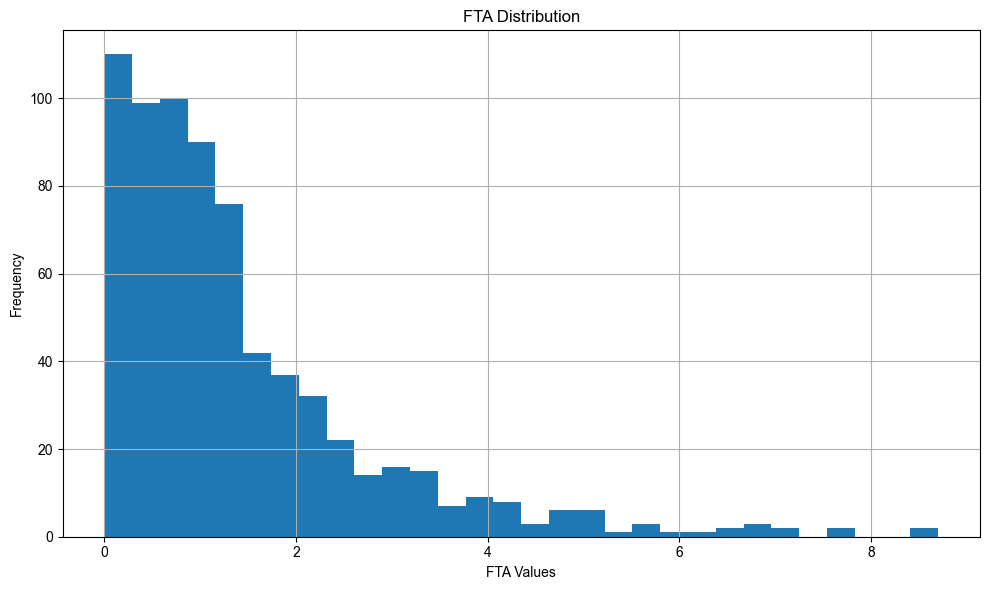

<Figure size 640x480 with 0 Axes>

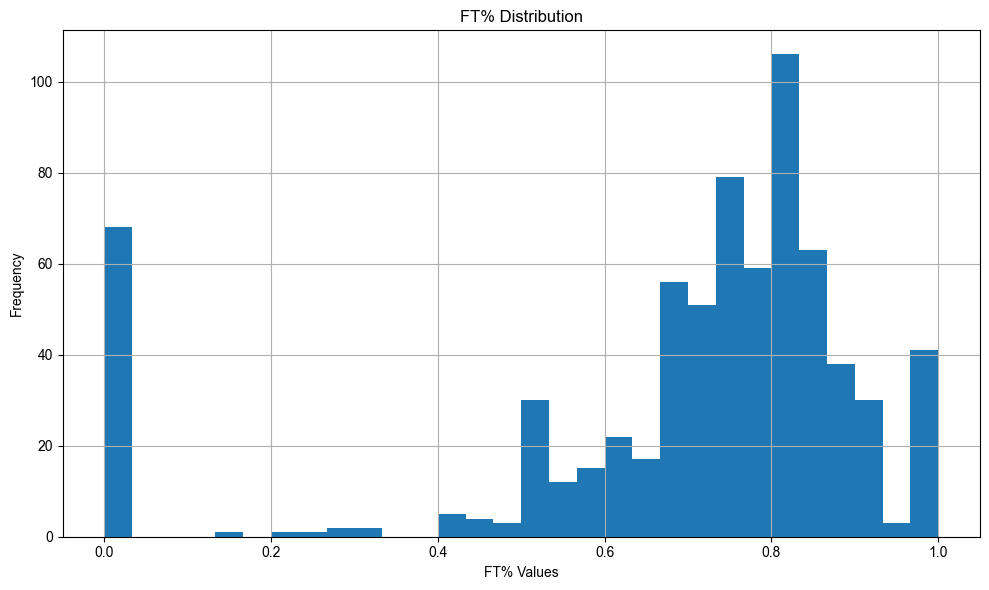

<Figure size 640x480 with 0 Axes>

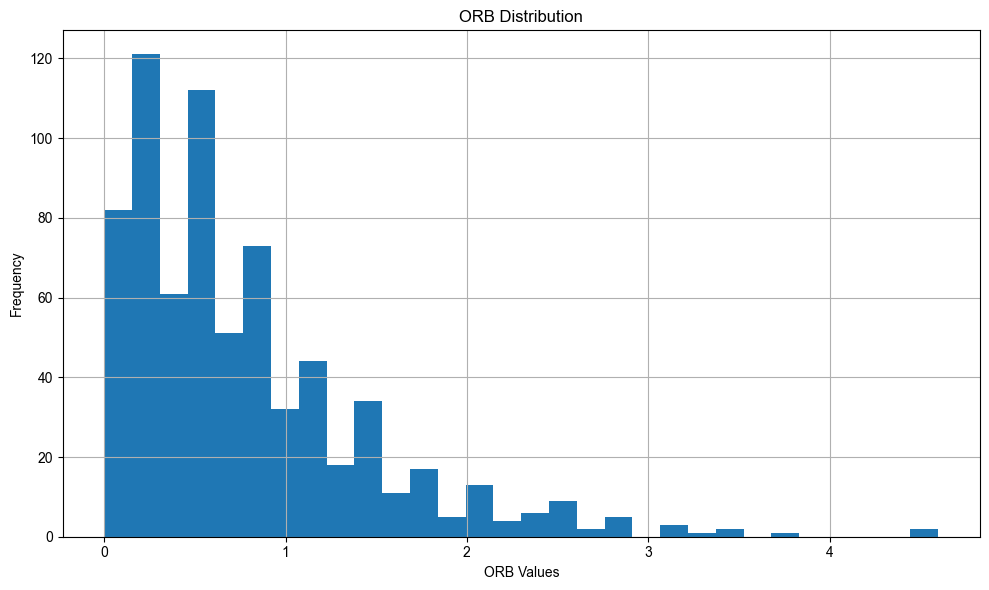

<Figure size 640x480 with 0 Axes>

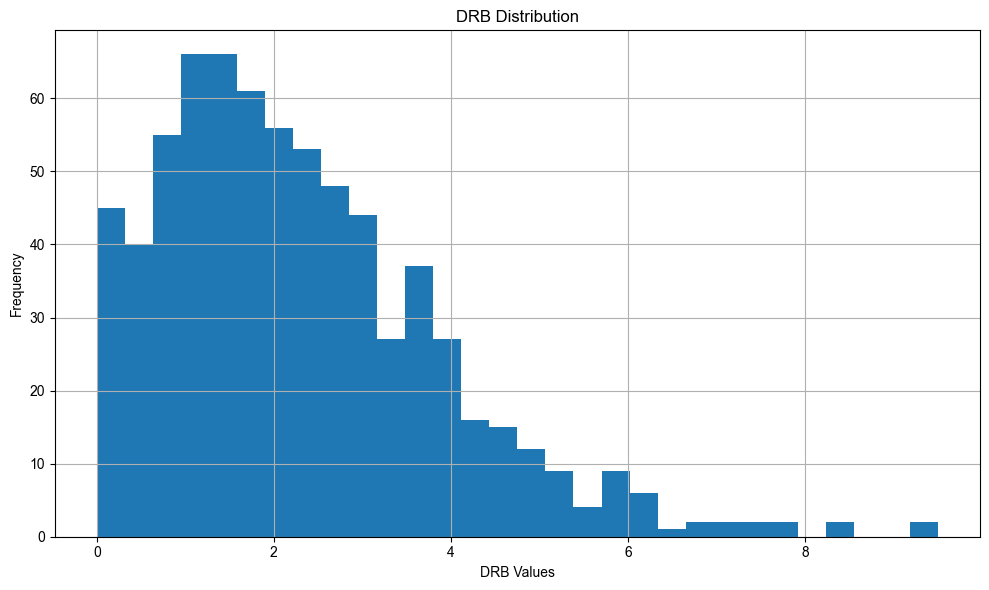

<Figure size 640x480 with 0 Axes>

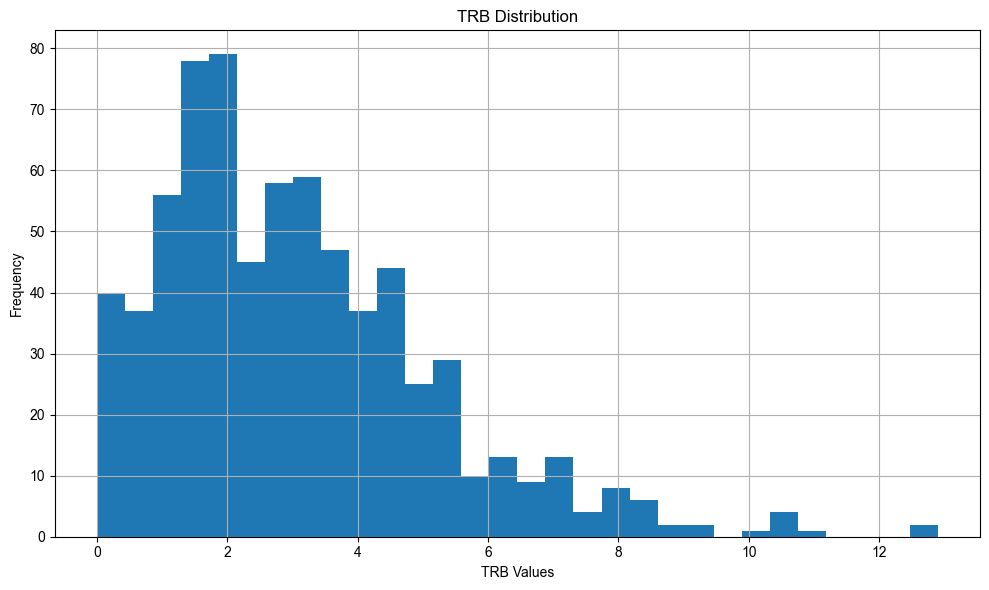

<Figure size 640x480 with 0 Axes>

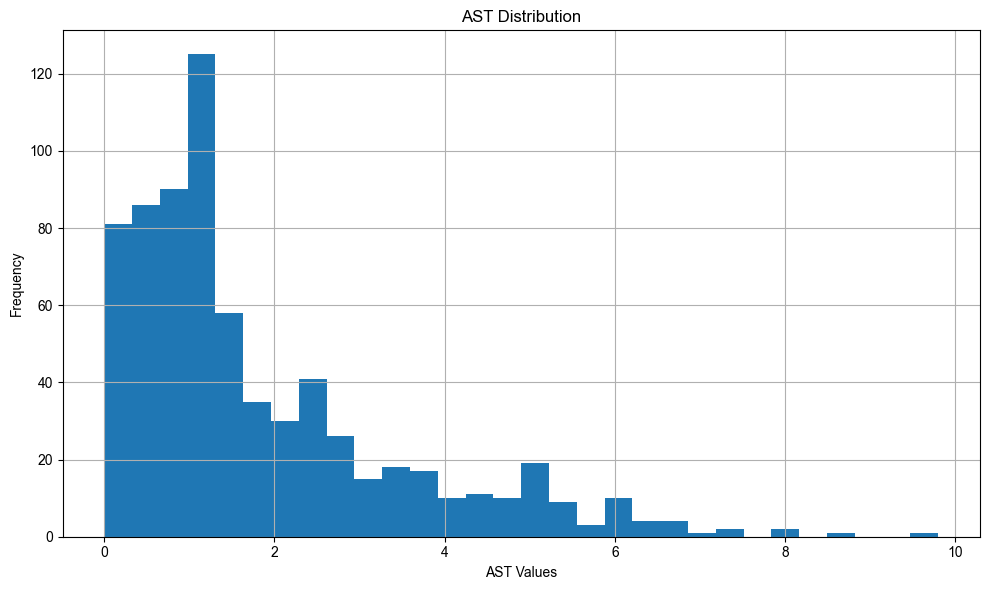

<Figure size 640x480 with 0 Axes>

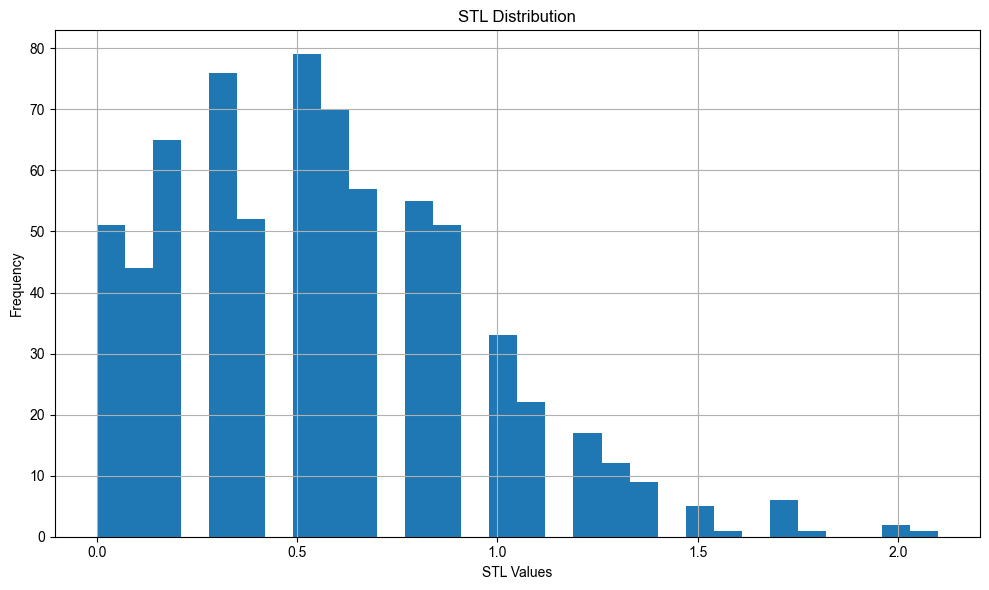

<Figure size 640x480 with 0 Axes>

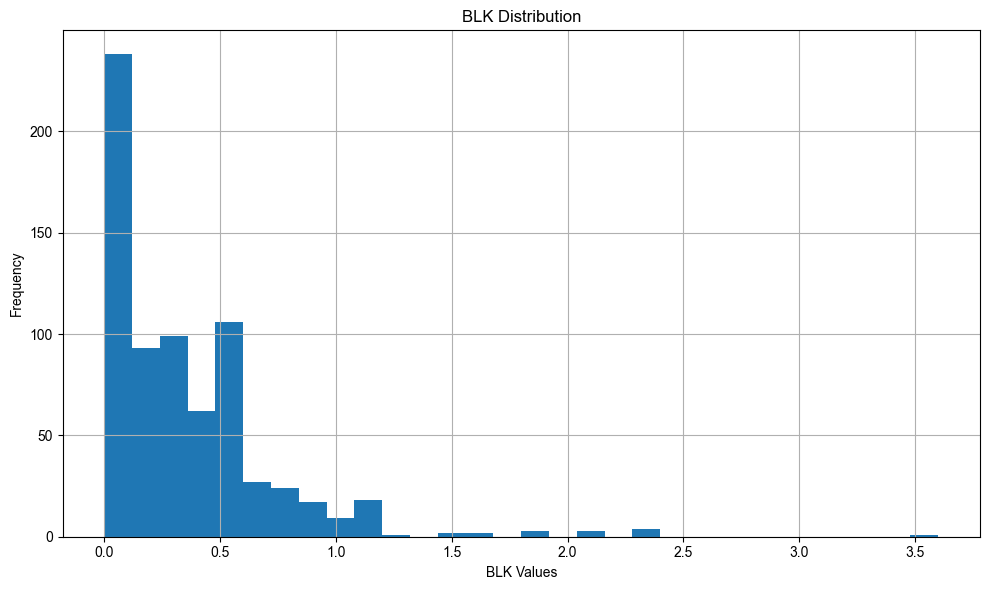

<Figure size 640x480 with 0 Axes>

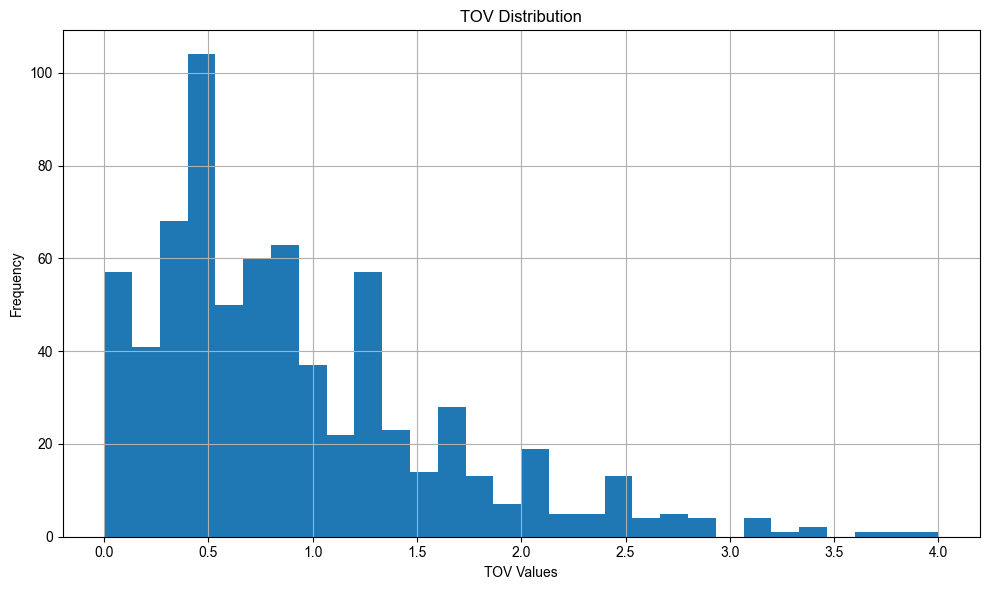

<Figure size 640x480 with 0 Axes>

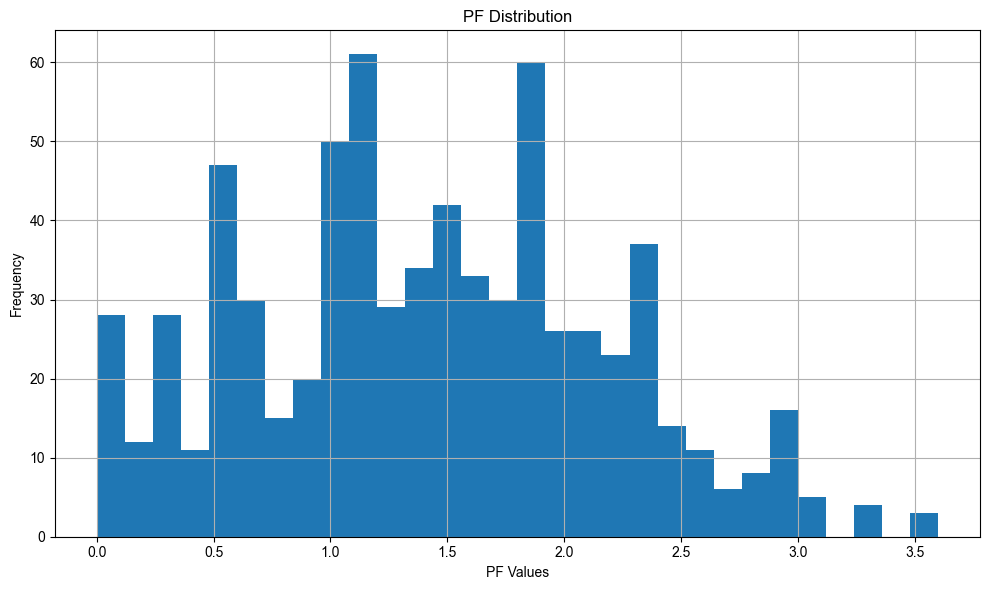

<Figure size 640x480 with 0 Axes>

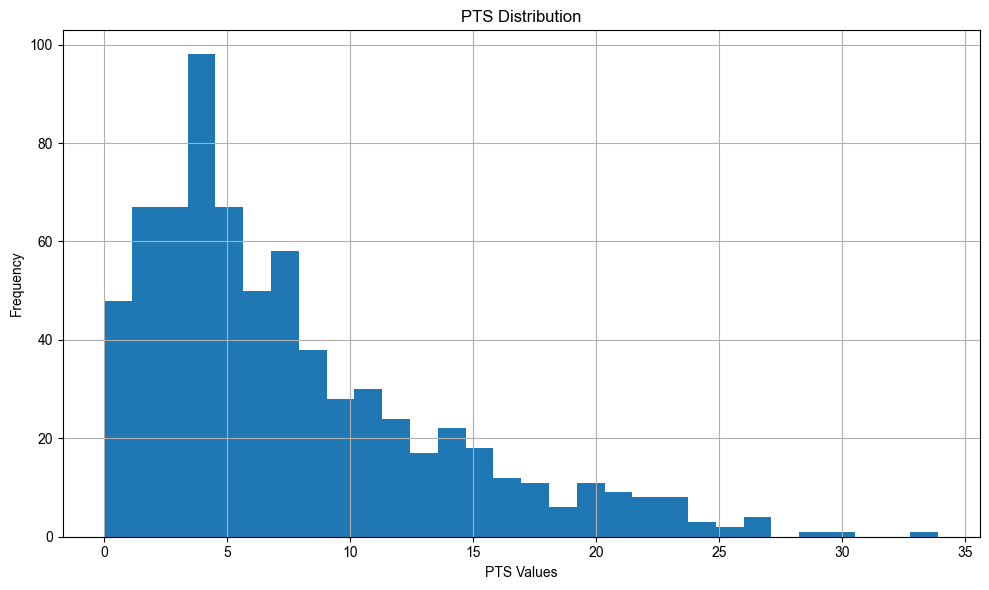

<Figure size 640x480 with 0 Axes>

In [41]:
# Loop through each column and plot a histogram for each
for col in df.columns:
    plt.figure(figsize=(10, 6))  # Create a new figure for each plot
    df[col].hist(bins=30)  # Plot the histogram for the column
    plt.ylabel('Frequency')  # Y-axis label
    plt.xlabel(f'{col} Values')  # X-axis label
    plt.title(f'{col} Distribution')  # Title for the plot
    plt.tight_layout()  # Adjust layout for better appearance
    plt.show()  # Show the plot
    plt.clf()  # Clear the current figure to avoid overlapping

In [40]:
from pyod.models.knn import KNN
from sklearn.ensemble import IsolationForest

data = df.copy()
data = data.drop(columns=['Player', 'Tm', 'Pos'])

model = KNN()
estimation_knn = model.fit_predict(data) == 1 
outliers_knn = (estimation_knn).sum()
print('Number of anomalies (KNN): ', outliers_knn)

model = IsolationForest(n_estimators=100)
estimation_iforest = model.fit_predict(data) == -1
outliers_iforest = estimation_iforest.sum()
print('Number of anomalies (isolation forest): ', outliers_iforest)

print('Matched: ', (estimation_knn & estimation_iforest).sum())

df_clean = df.copy()
mask = ~(estimation_knn & estimation_iforest)
df_clean = df[mask]

df_clean.info()
df = df_clean.copy()

c:\Users\betak\NBA-Archetypes\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Number of anomalies (KNN):  74
Number of anomalies (isolation forest):  107
Matched:  26
<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 0 to 733
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      709 non-null    int64  
 1   Player  709 non-null    object 
 2   Pos     709 non-null    object 
 3   Age     709 non-null    int64  
 4   Tm      709 non-null    object 
 5   G       709 non-null    int64  
 6   GS      709 non-null    int64  
 7   MP      709 non-null    float64
 8   FG      709 non-null    float64
 9   FGA     709 non-null    float64
 10  FG%     709 non-null    float64
 11  3P      709 non-null    float64
 12  3PA     709 non-null    float64
 13  3P%     709 non-null    float64
 14  2P      709 non-null    float64
 15  2PA     709 non-null    float64
 16  2P%     709 non-null    float64
 17  eFG%    709 non-null    float64
 18  FT      709 non-null    float64
 19  FTA     709 non-null    float

In [44]:
# Define the mapping of current column names to full names
column_mapping = {
    'Rk': 'Rank',
    'Player': 'Player Name',
    'Pos': 'Position',
    'Age': 'Age',
    'Tm': 'Team',
    'G': 'Games Played',
    'GS': 'Games Started',
    'MP': 'Minutes Played',
    'FG': 'Field Goals Made',
    'FGA': 'Field Goals Attempted',
    'FG%': 'Field Goal Percentage',
    '3P': 'Three-Point Field Goals Made',
    '3PA': 'Three-Point Field Goals Attempted',
    '3P%': 'Three-Point Field Goal Percentage',
    '2P': 'Two-Point Field Goals Made',
    '2PA': 'Two-Point Field Goals Attempted',
    '2P%': 'Two-Point Field Goal Percentage',
    'eFG%': 'Effective Field Goal Percentage',
    'FT': 'Free Throws Made',
    'FTA': 'Free Throws Attempted',
    'FT%': 'Free Throw Percentage',
    'ORB': 'Offensive Rebounds',
    'DRB': 'Defensive Rebounds',
    'TRB': 'Total Rebounds',
    'AST': 'Assists',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'TOV': 'Turnovers',
    'PF': 'Personal Fouls',
    'PTS': 'Points'
}

# Rename the columns using the mapping
df.rename(columns=column_mapping, inplace=True)

In [45]:
df = df.drop(columns=['Age', 
                      'Rank', 
                      'Position', 
                      'Team',
                      'Games Played',
                      'Games Started',
                      'Field Goal Percentage',
                      'Three-Point Field Goal Percentage', 
                      'Two-Point Field Goal Percentage', 
                      'Effective Field Goal Percentage',
                      'Free Throw Percentage', 
                      'Total Rebounds',
                      'Field Goals Made',
                      'Field Goals Attempted'
                      ])

1) Rank ('Rk'): This is just an identifier of player rank and does not represent a player's performance, so it does not contribute to clustering.
2) Player Name ('Player'): This is also an identifier, not a numeric or performance-related feature.
3) Age ('Age'): While age can influence a player's style, it may not directly contribute to player archetypes like playing style or efficiency. If you want to account for experience or prime age, you could consider including it.
4) Team ('Tm'): Teams influence player performance but may not help identify archetypes unless you want to include team-based playing styles. You can drop this feature unless team context is crucial for the clustering.
5) Games Played ('G'): If the dataset already has a substantial number of games for each player, this might be redundant, as you may already have performance metrics (e.g., minutes played, points) that reflect their impact on the court.
6) Games Started ('GS'): Similar to 'Games Played,' this feature may not add unique information when compared to other features like 'Minutes Per Game' or 'Points'.
7) Field Goal Percentage ('FG%') and Effective Field Goal Percentage ('eFG%'): If you're using other shooting stats like 'Field Goals Made', '3P%', and '2P%', you might not need these, as they can be highly correlated.

In [46]:
aggregated_df = df.groupby('Player Name').agg({
    #'Age': 'first',  # Use the first occurrence of age, assuming age doesn’t change within a season
    #'Games Played': 'sum',  # Total games played
    #'Games Started': 'sum',  # Total games started
    'Minutes Played': 'sum',  # Total minutes played
    #'Field Goals Made': 'sum',  # Total field goals made
    #'Field Goals Attempted': 'sum',  # Total field goals attempted
    #'Field Goal Percentage': 'mean',
    'Three-Point Field Goals Made': 'sum',  # Total three-pointers made
    'Three-Point Field Goals Attempted': 'sum',  # Total three-point attempts
    #'Three-Point Field Goal Percentage': 'mean',
    'Two-Point Field Goals Made': 'sum',  # Total two-pointers made
    'Two-Point Field Goals Attempted': 'sum',  # Total two-point attempts
    #'Two-Point Field Goal Percentage': 'mean',
    #'Effective Field Goal Percentage': 'mean',
    'Free Throws Made': 'sum',  # Total free throws made
    'Free Throws Attempted': 'sum',  # Total free throw attempts
    #'Free Throw Percentage': 'mean',
    'Offensive Rebounds': 'sum',  # Total offensive rebounds
    'Defensive Rebounds': 'sum',  # Total defensive rebounds
    #'Total Rebounds': 'sum',  # Total rebounds
    'Assists': 'sum',  # Total assists
    'Steals': 'sum',  # Total steals
    'Blocks': 'sum',  # Total blocks
    'Turnovers': 'sum',  # Total turnovers
    'Personal Fouls': 'sum'  # Total personal fouls
    #'Points': 'sum'   # Total points scored
}).reset_index()

# Verify the aggregated data
analyze(aggregated_df)

,Player Name,Minutes Played,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls
0,A.J. Green,11.0,1.2,3.0,0.3,0.5,0.3,0.3,0.2,1.0,0.5,0.2,0.1,0.2,0.9
1,A.J. Lawson,7.4,0.3,1.2,1.0,1.7,0.4,0.5,0.3,0.9,0.5,0.2,0.1,0.3,0.5
2,AJ Griffin,8.6,0.5,2.0,0.4,1.2,0.1,0.1,0.1,0.8,0.3,0.1,0.1,0.4,0.3
3,Aaron Gordon,31.5,0.5,1.9,4.9,7.9,2.4,3.7,2.4,4.1,3.5,0.8,0.6,1.4,1.9
4,Aaron Holiday,16.3,1.1,2.8,1.3,2.6,0.7,0.8,0.3,1.3,1.8,0.5,0.1,0.7,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Zach LaVine,34.9,2.4,6.8,4.4,8.3,3.5,4.1,0.3,4.8,3.9,0.8,0.3,2.1,2.3
543,Zavier Simpson,23.0,0.7,2.4,1.7,5.3,0.4,0.6,0.6,2.3,3.6,1.0,0.4,1.4,1.6
544,Zeke Nnaji,9.9,0.1,0.4,1.1,2.2,0.7,1.1,1.1,1.1,0.6,0.3,0.7,0.5,1.4
545,Ziaire Williams,20.4,1.1,3.7,1.8,3.7,1.2,1.5,0.7,2.8,1.5,0.7,0.2,1.3,1.7


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 0 to 733
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player Name                        709 non-null    object 
 1   Minutes Played                     709 non-null    float64
 2   Three-Point Field Goals Made       709 non-null    float64
 3   Three-Point Field Goals Attempted  709 non-null    float64
 4   Two-Point Field Goals Made         709 non-null    float64
 5   Two-Point Field Goals Attempted    709 non-null    float64
 6   Free Throws Made                   709 non-null    float64
 7   Free Throws Attempted              709 non-null    float64
 8   Offensive Rebounds                 709 non-null    float64
 9   Defensive Rebounds                 709 non-null    float64
 10  Assists                            709 non-null    float64
 11  Steals                             709 non-null

In [47]:
display(aggregated_df.head(30))

,Player Name,Minutes Played,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls
0,A.J. Green,11.0,1.2,3.0,0.3,0.5,0.3,0.3,0.2,1.0,0.5,0.2,0.1,0.2,0.9
1,A.J. Lawson,7.4,0.3,1.2,1.0,1.7,0.4,0.5,0.3,0.9,0.5,0.2,0.1,0.3,0.5
2,AJ Griffin,8.6,0.5,2.0,0.4,1.2,0.1,0.1,0.1,0.8,0.3,0.1,0.1,0.4,0.3
3,Aaron Gordon,31.5,0.5,1.9,4.9,7.9,2.4,3.7,2.4,4.1,3.5,0.8,0.6,1.4,1.9
4,Aaron Holiday,16.3,1.1,2.8,1.3,2.6,0.7,0.8,0.3,1.3,1.8,0.5,0.1,0.7,1.6
5,Aaron Nesmith,27.7,1.9,4.6,2.4,4.2,1.5,1.9,0.9,2.9,1.5,0.9,0.7,0.9,3.3
6,Aaron Wiggins,15.7,0.8,1.6,1.9,3.2,0.7,0.9,0.8,1.6,1.1,0.7,0.2,0.7,1.2
7,Adam Flagler,7.0,0.5,3.0,0.0,0.5,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
8,Adama Sanogo,7.3,0.0,0.0,1.6,3.0,0.9,1.3,2.1,1.9,0.0,0.1,0.0,0.6,0.6
9,Admiral Schofield,3.7,0.3,0.7,0.2,0.4,0.0,0.1,0.1,0.6,0.3,0.0,0.0,0.2,0.4


### Code

In [48]:
names = aggregated_df['Player Name']
aggregated_df = aggregated_df.drop(columns='Player Name')

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_df = pd.DataFrame(scaler.fit_transform(aggregated_df), columns=aggregated_df.columns)
analyze(scaled_df)

,Minutes Played,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls
0,-0.695095,0.032410,-0.090762,-0.884302,-0.919215,-0.689990,-0.763457,-0.810040,-0.808687,-0.748356,-0.833685,-0.722087,-0.912185,-0.682569
1,-0.902993,-0.696153,-0.639347,-0.601263,-0.654578,-0.626759,-0.661452,-0.710200,-0.849679,-0.748356,-0.833685,-0.722087,-0.817235,-0.972844
2,-0.833694,-0.534250,-0.395532,-0.843868,-0.764844,-0.816452,-0.865463,-0.909880,-0.890672,-0.828550,-0.987799,-0.722087,-0.722284,-1.117981
3,0.488770,-0.534250,-0.426009,0.975667,0.712714,0.637857,0.970639,1.386450,0.462085,0.454555,0.091004,0.238939,0.227222,0.043117
4,-0.389023,-0.048541,-0.151716,-0.479961,-0.456100,-0.437067,-0.508443,-0.710200,-0.685709,-0.227094,-0.371340,-0.722087,-0.437432,-0.174589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0.685118,1.003828,1.067362,0.773496,0.800927,1.333396,1.174650,-0.710200,0.749034,0.614944,0.091004,-0.337677,0.891876,0.333391
543,-0.002101,-0.372347,-0.273624,-0.318224,0.139334,-0.626759,-0.610449,-0.410678,-0.275782,0.494652,0.399233,-0.145472,0.227222,-0.174589
544,-0.758620,-0.858057,-0.883163,-0.560829,-0.544313,-0.437067,-0.355435,0.088524,-0.767694,-0.708259,-0.679570,0.431144,-0.627334,-0.319726
545,-0.152250,-0.048541,0.122576,-0.277790,-0.213516,-0.120913,-0.151423,-0.310838,-0.070819,-0.347386,-0.063111,-0.529882,0.132271,-0.102021


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 0 to 733
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player Name                        709 non-null    object 
 1   Minutes Played                     709 non-null    float64
 2   Three-Point Field Goals Made       709 non-null    float64
 3   Three-Point Field Goals Attempted  709 non-null    float64
 4   Two-Point Field Goals Made         709 non-null    float64
 5   Two-Point Field Goals Attempted    709 non-null    float64
 6   Free Throws Made                   709 non-null    float64
 7   Free Throws Attempted              709 non-null    float64
 8   Offensive Rebounds                 709 non-null    float64
 9   Defensive Rebounds                 709 non-null    float64
 10  Assists                            709 non-null    float64
 11  Steals                             709 non-null

## EDA

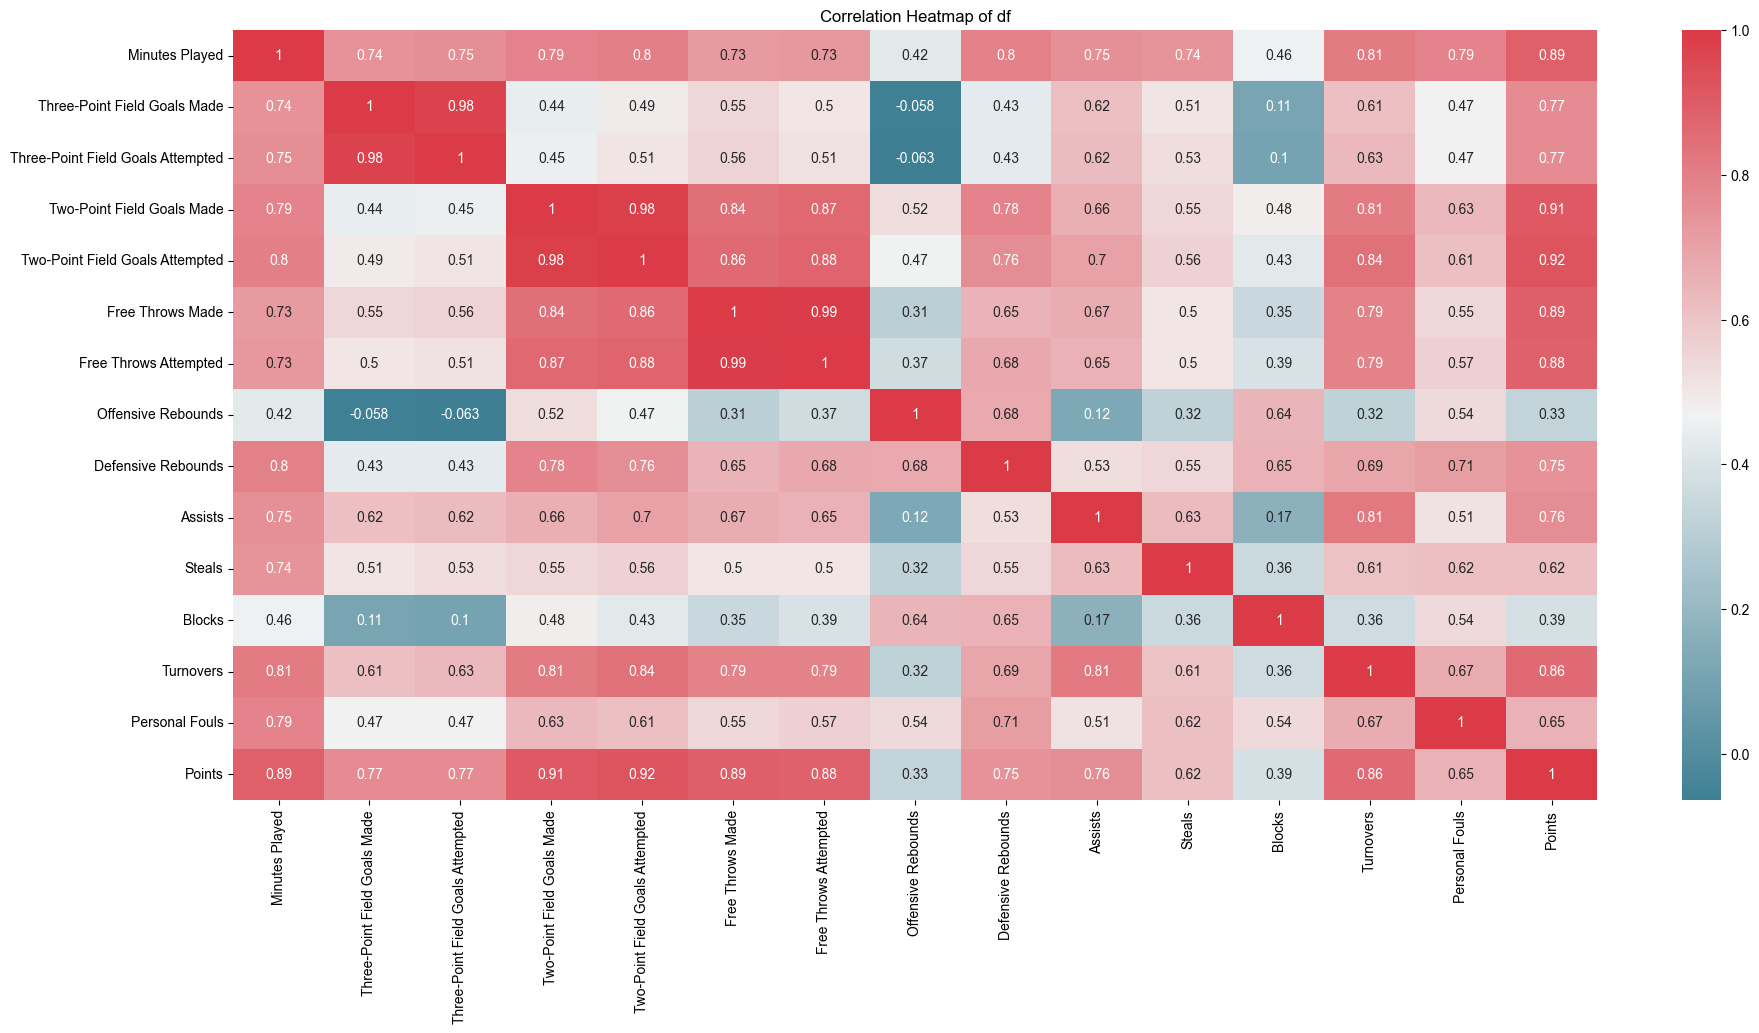

In [49]:
numerical_columns = df.select_dtypes(include=[np.number])
corr = numerical_columns.corr()
plt.figure(figsize=(22, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)
plt.title(label='Correlation Heatmap of df')
plt.show()

## PCA

- Original data had 30 features
- Used principal component analysis to reduce that down to 6 components
- Chose 6 because it retained 96% of the information but still significantly reduced down dimensions
- Reataining 95% of the information was the goal

For n_components = 2, explained variance ratio is 0.8099530997460839
For n_components = 3, explained variance ratio is 0.885331445487475
For n_components = 4, explained variance ratio is 0.9175100326871342
For n_components = 5, explained variance ratio is 0.9387140596894689
For n_components = 6, explained variance ratio is 0.9560777931268304
For n_components = 7, explained variance ratio is 0.9702081435734693
For n_components = 8, explained variance ratio is 0.9807846980494885
For n_components = 9, explained variance ratio is 0.9885225005719575
For n_components = 10, explained variance ratio is 0.9951850658821794
For n_components = 11, explained variance ratio is 0.9978450621529052
For n_components = 12, explained variance ratio is 0.9989631153058806
For n_components = 13, explained variance ratio is 0.9995561153312149


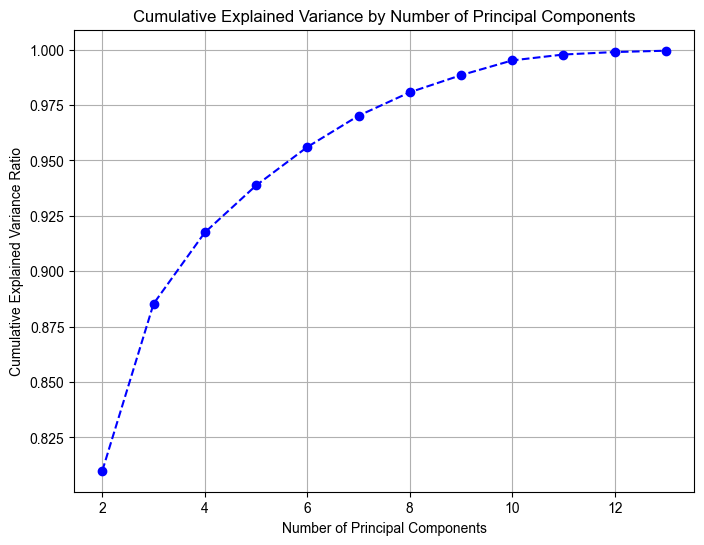

In [50]:
variance_list = []

for n_components in range(2,14):
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(scaled_df)
    variance = sum(pca.explained_variance_ratio_)
    variance_list.append(variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, variance))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 14), variance_list, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

For n_clusters = 2, silhouette score is 0.480369
For n_clusters = 3, silhouette score is 0.396767
For n_clusters = 4, silhouette score is 0.396550
For n_clusters = 5, silhouette score is 0.289393
For n_clusters = 6, silhouette score is 0.285338
For n_clusters = 7, silhouette score is 0.291150
For n_clusters = 8, silhouette score is 0.261215
For n_clusters = 9, silhouette score is 0.240235
For n_clusters = 10, silhouette score is 0.209166
For n_clusters = 11, silhouette score is 0.212206
For n_clusters = 12, silhouette score is 0.205977
For n_clusters = 13, silhouette score is 0.209521
For n_clusters = 14, silhouette score is 0.225102
For n_clusters = 15, silhouette score is 0.180753


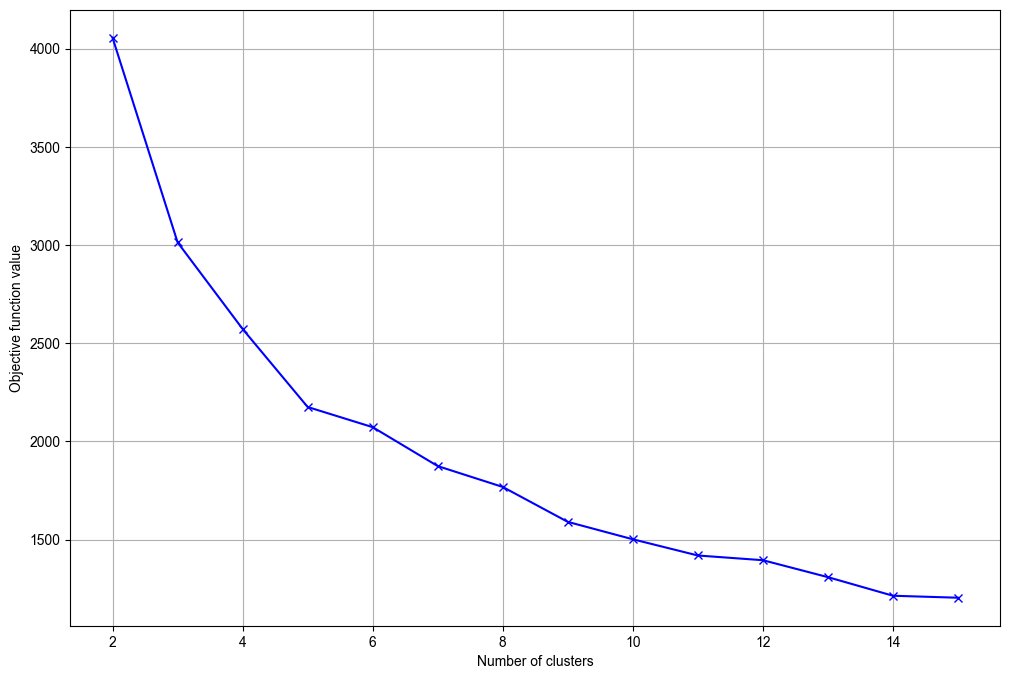

In [75]:
# Perform PCA to reduce data to 6 components
pca_6 = PCA(n_components=6)
reduced_data = pca_6.fit_transform(scaled_df)

# Initialize a list to store silhouette scores
silhouette_scores = []
distortion = []

# Range for the number of clusters
K = range(2, 16)  # Start from 2 because silhouette score is undefined for 1 cluster

# Calculate silhouette score for each value of K
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(reduced_data)
    score = silhouette_score(scaled_df, model.labels_)
    silhouette_scores.append(score)
    distortion.append(model.inertia_)

    # Output the silhouette score for each k
    print(f"For n_clusters = {k}, silhouette score is {score:.6f}")

plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Objective function value')
plt.grid(True)
plt.show()


In [76]:
'''
# Perform PCA to reduce the data to 6 components
pca = PCA(n_components=6)
scaled_df_pca_6 = pca.fit_transform(scaled_df)

# Fit KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=12345)
kmeans.fit(components_6)

# Reduce data to 2 components for visualization
pca_2d = PCA(n_components=2)
scaled_df_pca_2d = pca_2d.fit_transform(components_6)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = pca_2d.transform(kmeans.cluster_centers_)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(scaled_df_pca_2d[:, 0], scaled_df_pca_2d[:, 1], c=labels, cmap='viridis', alpha=0.6, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters and Centroids (Reduced to 2 Components)')
plt.legend(labels=labels)

# Show the plot
plt.show()
'''

"\n# Perform PCA to reduce the data to 6 components\npca = PCA(n_components=6)\nscaled_df_pca_6 = pca.fit_transform(scaled_df)\n\n# Fit KMeans with 5 clusters\nkmeans = KMeans(n_clusters=5, random_state=12345)\nkmeans.fit(components_6)\n\n# Reduce data to 2 components for visualization\npca_2d = PCA(n_components=2)\nscaled_df_pca_2d = pca_2d.fit_transform(components_6)\n\n# Get the cluster labels and centroids\nlabels = kmeans.labels_\ncentroids = pca_2d.transform(kmeans.cluster_centers_)\n\n# Plot the clusters\nplt.figure(figsize=(10, 8))\nplt.scatter(scaled_df_pca_2d[:, 0], scaled_df_pca_2d[:, 1], c=labels, cmap='viridis', alpha=0.6, s=50)\nplt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')\n\n# Add labels and title\nplt.xlabel('PCA Component 1')\nplt.ylabel('PCA Component 2')\nplt.title('KMeans Clusters and Centroids (Reduced to 2 Components)')\nplt.legend(labels=labels)\n\n# Show the plot\nplt.show()\n"

In [77]:

kmeans = KMeans(n_clusters=6, random_state=12345)
kmeans.fit(reduced_data)
labels = kmeans.labels_


# Step 3: Reduce to 2 PCA components for visualization
pca_2d = PCA(n_components=2)
reduced_data_2d = pca_2d.fit_transform(reduced_data)

# Project centroids into the 2D PCA space
centroids = pca_2d.transform(kmeans.cluster_centers_)


df_pca = pd.DataFrame(reduced_data_2d, columns=['PCA Component 1', 'PCA Component 2'])
df_pca['Cluster'] = labels.astype(str)  # Add cluster labels to the DataFrame

color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'purple'}
    
# Create the scatter plot using Plotly Express
fig = px.scatter( # type: ignore
        df_pca, 
        x='PCA Component 1', 
        y='PCA Component 2', 
        color='Cluster',  # Color by cluster labels
        color_discrete_map=color_map,  # Match the 'viridis' color scale
        opacity=0.6,  # Set transparency
        title='KMeans Clusters and Centroids (Reduced to 2 Components)',
        labels={'PCA Component 1': 'PCA Component 1', 'PCA Component 2': 'PCA Component 2'},
        template=None  # Optional: use a dark theme
    )

    # Add centroids to the plot as red 'x' markers
fig.add_scatter(
        x=centroids[:, 0], 
        y=centroids[:, 1], 
        mode='markers', 
        marker=dict(color='red', size=15, symbol='x', line=dict(width=2, color='DarkSlateGrey')),
        name='Centroids', 
        hoverinfo='text', 
        text=['Centroid'] * len(centroids)
)

    # Show the plot
fig.show()

NameError: name 'px' is not defined

Five clusters also correspond to a five-member basketball team that is allowed on a court at any one time.

In [78]:
aggregated_df['Player Name'] = names
aggregated_df['Archetype'] = labels.astype(str)

columns = ['Player Name', 'Archetype'] + [col for col in aggregated_df.columns if col not in ['Player Name', 'Archetype']]
aggregated_df = aggregated_df[columns]

# Display the updated DataFrame
display(aggregated_df)

,Player Name,Archetype,Minutes Played,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls
0,A.J. Green,4,11.0,1.2,3.0,0.3,0.5,0.3,0.3,0.2,1.0,0.5,0.2,0.1,0.2,0.9
1,A.J. Lawson,4,7.4,0.3,1.2,1.0,1.7,0.4,0.5,0.3,0.9,0.5,0.2,0.1,0.3,0.5
2,AJ Griffin,4,8.6,0.5,2.0,0.4,1.2,0.1,0.1,0.1,0.8,0.3,0.1,0.1,0.4,0.3
3,Aaron Gordon,2,31.5,0.5,1.9,4.9,7.9,2.4,3.7,2.4,4.1,3.5,0.8,0.6,1.4,1.9
4,Aaron Holiday,4,16.3,1.1,2.8,1.3,2.6,0.7,0.8,0.3,1.3,1.8,0.5,0.1,0.7,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Zach LaVine,1,34.9,2.4,6.8,4.4,8.3,3.5,4.1,0.3,4.8,3.9,0.8,0.3,2.1,2.3
543,Zavier Simpson,0,23.0,0.7,2.4,1.7,5.3,0.4,0.6,0.6,2.3,3.6,1.0,0.4,1.4,1.6
544,Zeke Nnaji,4,9.9,0.1,0.4,1.1,2.2,0.7,1.1,1.1,1.1,0.6,0.3,0.7,0.5,1.4
545,Ziaire Williams,0,20.4,1.1,3.7,1.8,3.7,1.2,1.5,0.7,2.8,1.5,0.7,0.2,1.3,1.7


Archetype
4    38.939671
0    33.272395
1    15.904936
2     7.495430
5     3.839122
3     0.548446
Name: proportion, dtype: float64


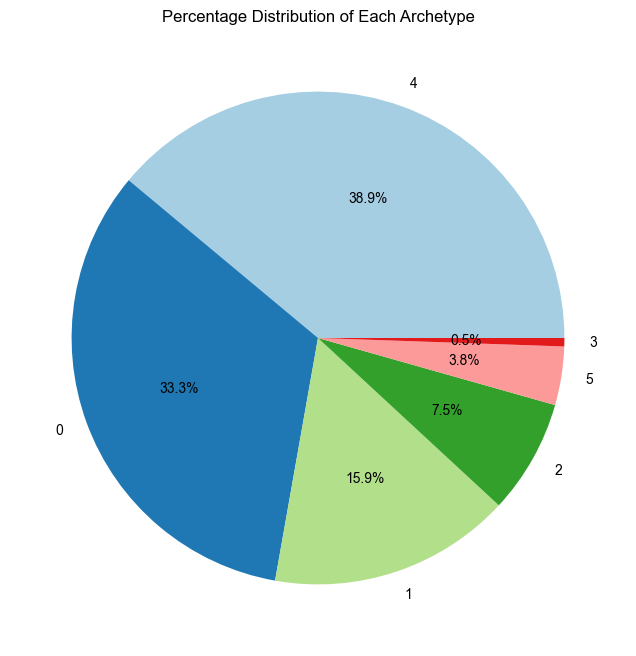

In [79]:
# Calculate the percentage of each archetype
archetype_counts = aggregated_df['Archetype'].value_counts(normalize=True) * 100

# Display the results as percentages
print(archetype_counts)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(archetype_counts, labels=archetype_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Each Archetype')
plt.show()

In [80]:
loadings = pca_6.components_

# Create a DataFrame for better visualization
loading_df = pd.DataFrame(loadings, columns=scaled_df.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])

# Display the loadings
display(loading_df)

,Minutes Played,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls
PC1,0.307915,0.238696,0.246026,0.290463,0.294587,0.278175,0.281790,0.195281,0.289262,0.267405,0.256033,0.188258,0.297655,0.277204
PC2,-0.048607,-0.418161,-0.404760,0.114894,0.053224,-0.076226,-0.019115,0.542988,0.214567,-0.234820,-0.040180,0.467593,-0.080441,0.118303
PC3,-0.199263,-0.252793,-0.263203,0.316034,0.314284,0.406737,0.405415,-0.110617,-0.090162,0.038797,-0.339282,-0.253212,0.096905,-0.296945
PC4,0.036852,-0.382766,-0.323622,0.013385,0.039288,-0.173304,-0.162614,0.071245,-0.107018,0.473752,0.487601,-0.410789,0.176411,0.102995
PC5,-0.114050,-0.120950,-0.120702,-0.095456,-0.100126,0.162964,0.124798,-0.453865,-0.184278,0.235228,0.342979,0.658103,0.000111,-0.224740
PC6,0.011565,0.003741,0.043608,-0.032423,-0.030014,0.287054,0.275347,0.129296,-0.106593,-0.471053,0.607743,-0.229465,-0.403529,-0.054508


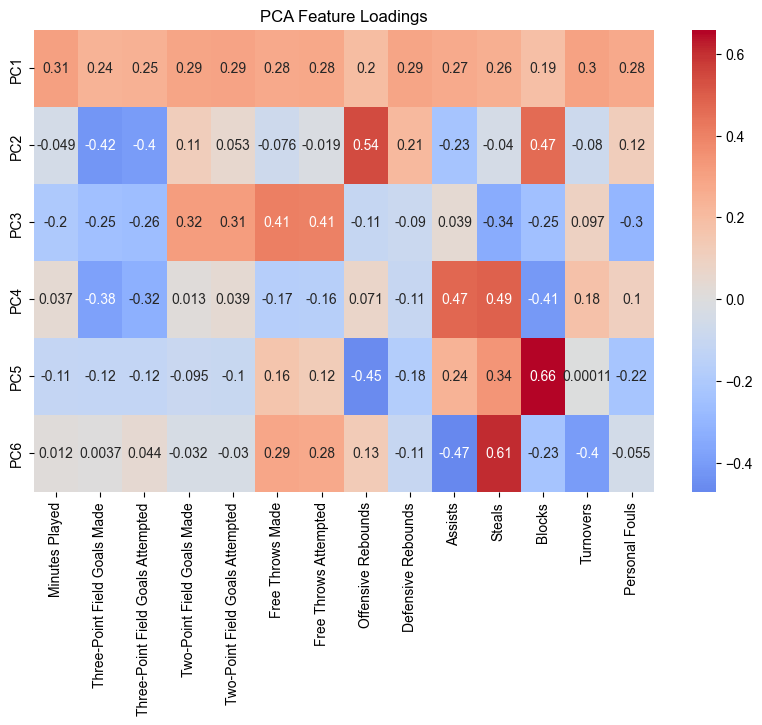

In [81]:
plt.figure(figsize=(10, 6))
sns.heatmap(loading_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Feature Loadings')
plt.show()

In [82]:
''''
import plotly.graph_objects as go
# Perform PCA with 6 components
pca_6 = PCA(n_components=6)
reduced_data = pca_6.fit_transform(scaled_df)

# Assuming kmeans has been fitted already
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=[f'PC{i+1}' for i in range(6)])
centroids["cluster"] = [0, 1, 2, 3, 4]  # Adjust based on the number of clusters

# Create the parallel coordinates plot
fig = go.Figure(data=go.Parcoords(
    line=dict(color=centroids["cluster"],
              colorscale="Jet", showscale=True),
    dimensions=[dict(label=col, values=centroids[col]) for col in centroids.columns[:-1]]  # Exclude the 'cluster' column
))

fig.update_layout(
    title="Parallel Coordinate Plot for NBA Players using Centroids",
)

fig.show()
'''

'\'\nimport plotly.graph_objects as go\n# Perform PCA with 6 components\npca_6 = PCA(n_components=6)\nreduced_data = pca_6.fit_transform(scaled_df)\n\n# Assuming kmeans has been fitted already\ncentroids = pd.DataFrame(kmeans.cluster_centers_, columns=[f\'PC{i+1}\' for i in range(6)])\ncentroids["cluster"] = [0, 1, 2, 3, 4]  # Adjust based on the number of clusters\n\n# Create the parallel coordinates plot\nfig = go.Figure(data=go.Parcoords(\n    line=dict(color=centroids["cluster"],\n              colorscale="Jet", showscale=True),\n    dimensions=[dict(label=col, values=centroids[col]) for col in centroids.columns[:-1]]  # Exclude the \'cluster\' column\n))\n\nfig.update_layout(\n    title="Parallel Coordinate Plot for NBA Players using Centroids",\n)\n\nfig.show()\n'

Minutes Played            Three-Point Field Goals Made            \
                    mean        std                         mean       std   
Archetype                                                                    
0              22.812637   5.968787                     1.165934  0.775982   
1              35.851724   7.877387                     2.289655  0.909259   
2              38.082927  12.394735                     0.929268  0.867826   
3              57.700000  10.132621                     0.566667  0.602771   
4               9.014085   4.380207                     0.384977  0.398061   
5              79.780952  16.016136                     4.823810  1.817665   

          Two-Point Field Goals Made           Free Throws Made            \
                                mean       std             mean       std   
Archetype                                                                   
0                           2.129670  0.893809         1.018132  0.534294   
1                           4.614943  1.614508         3.188506  1.422528   
2                           4.739024  1.845248         2.197561  1.172921   
3                          10.633333  2.914332         3.766667  1.674316   
4                           0.745070  0.535210         0.392958  0.383132   
5                           8.876190  4.665180         5.390476  2.762228   

          Offensive Rebounds            ...    Assists              Steals  \
                        mean       std  ...       mean       std      mean   
Archetype                               ...                                  
0                   1.032418  0.569476  ...   2.120879  1.350180  0.782967   
1                   0.883908  0.428592  ...   4.762069  1.886749  1.148276   
2                   2.931707  0.976842  ...   2.702439  1.543290  1.248780   
3                   6.733333  1.686219  ...   3.566667  0.550757  1.533333   
4                   0.452113  0.405106  ...   0.756808  0.593052  0.263380   
5                   2.461905  1.301720  ...  10.066667  3.737825  2.428571   

                       Blocks           Turnovers           Personal Fouls  \
                std      mean       std      mean       std           mean   
Archetype                                                                    
0          0.348930  0.478571  0.307965  1.030220  0.410927       1.870330   
1          0.549601  0.496552  0.279721  2.213793  0.679633       2.480460   
2          0.839679  1.524390  0.699922  1.792683  0.775368       3.378049   
3          0.305505  2.833333  1.040833  3.000000  0.871780       5.433333   
4          0.210507  0.171831  0.186464  0.376526  0.262989       0.820657   
5          0.667190  1.061905  0.563450  4.385714  1.017490       5.761905   

                     
                std  
Archetype            
0          0.564511  
1          0.863180  
2          1.421357  
3          0.568624  
4          0.511883  
5          1.789267  

[6 rows x 22 columns]

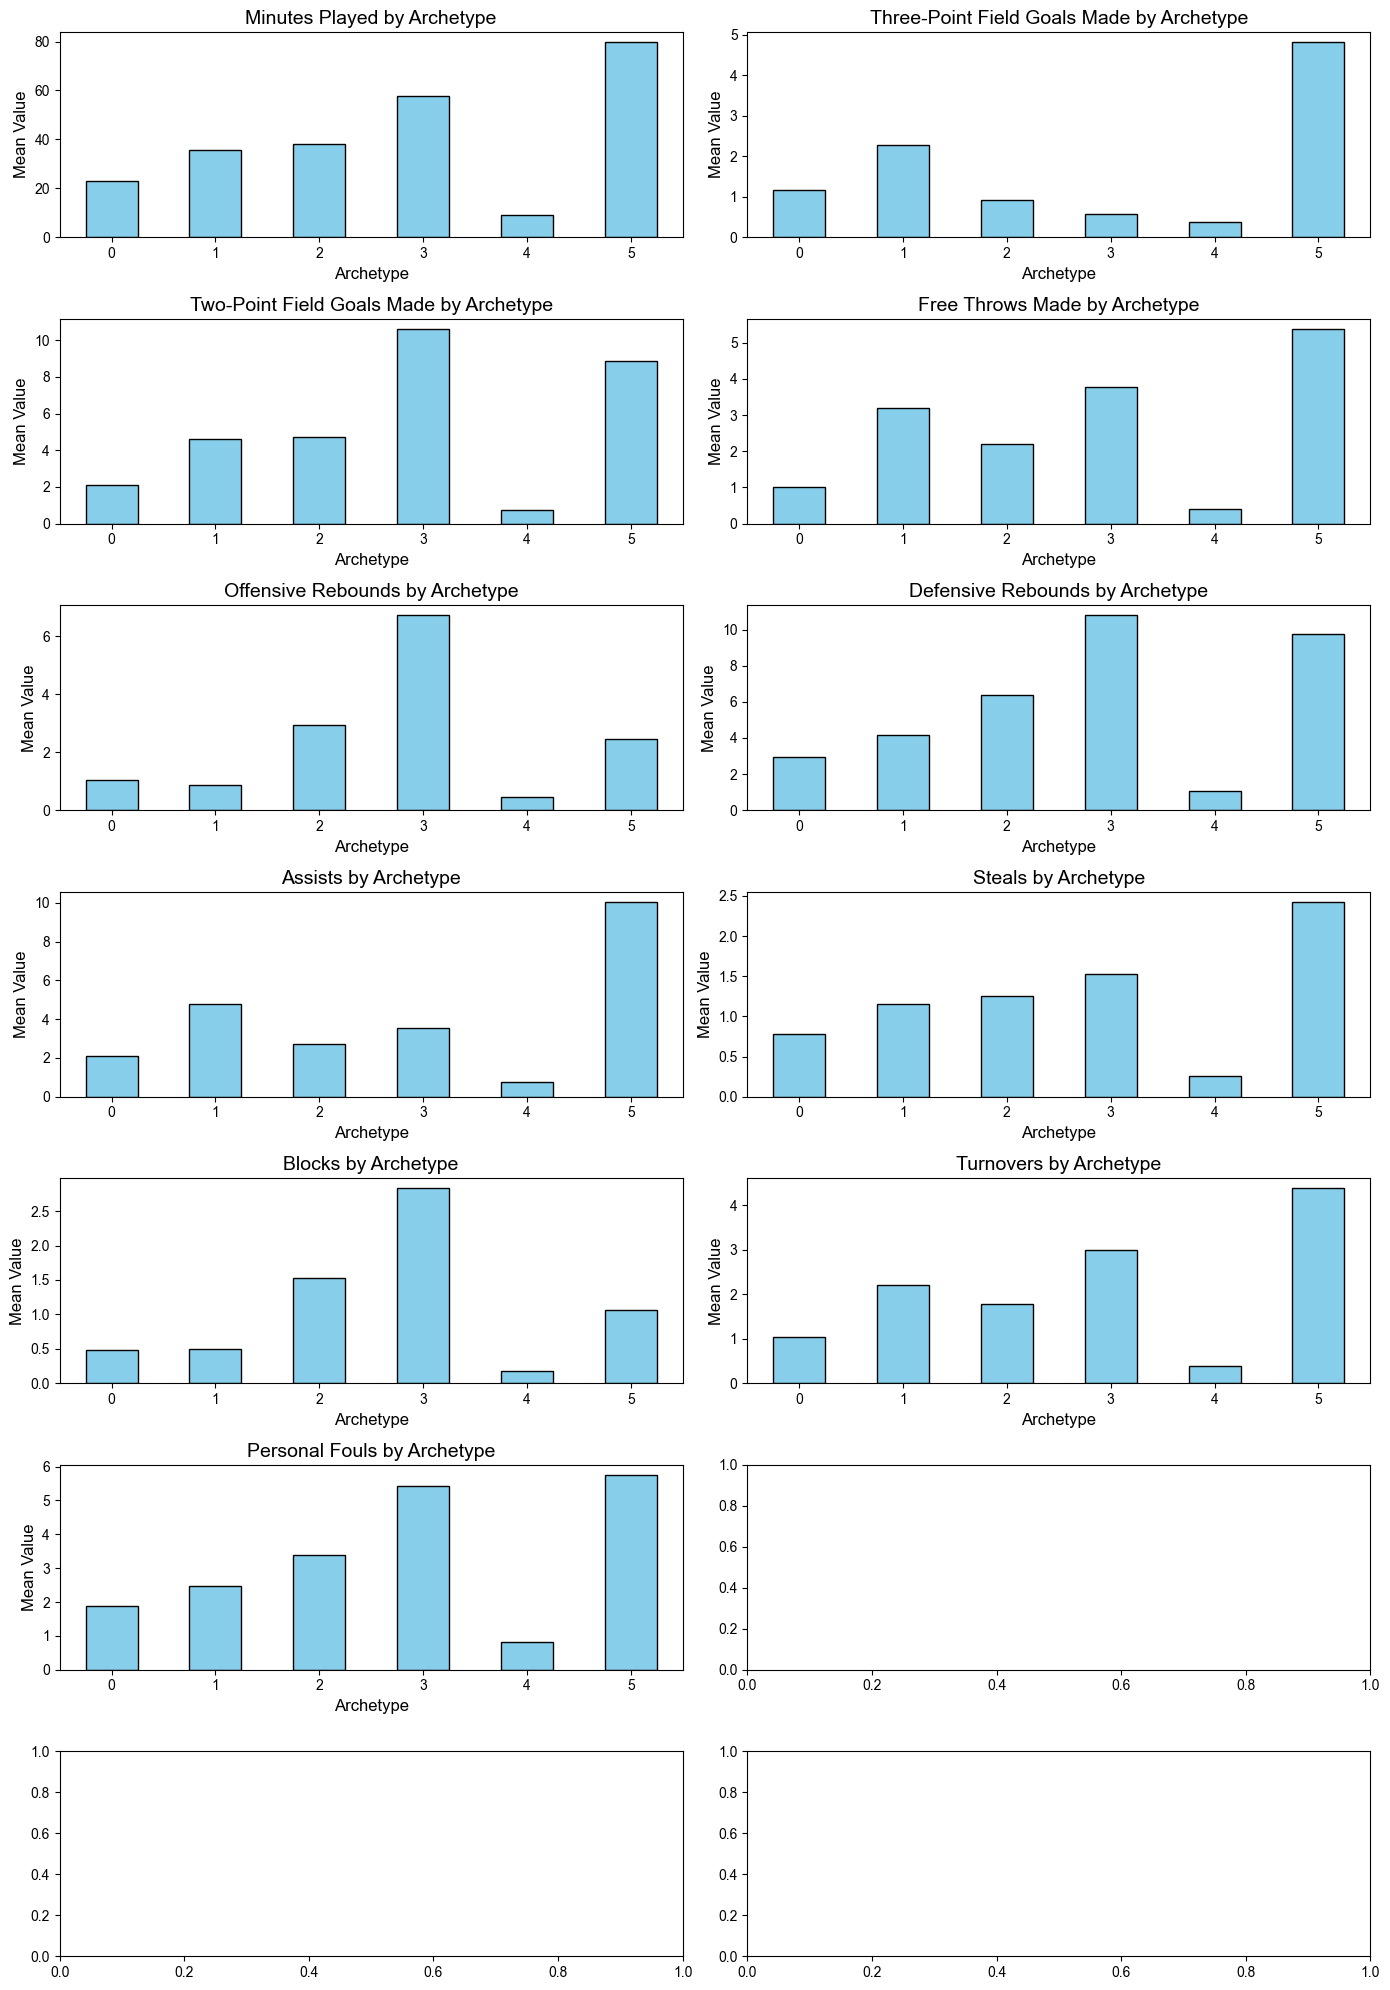

In [83]:
# Grouping by 'Cluster' and calculating the mean for each feature
cluster_stats = aggregated_df.groupby('Archetype').agg({
    #'Age': ['mean', 'std'],
    #'Games Played': ['mean', 'std'],
    'Minutes Played': ['mean', 'std'],
    'Three-Point Field Goals Made': ['mean', 'std'],
    'Two-Point Field Goals Made': ['mean', 'std'],
    'Free Throws Made': ['mean', 'std'],
    'Offensive Rebounds': ['mean', 'std'],
    'Defensive Rebounds': ['mean', 'std'],
    'Assists': ['mean', 'std'],
    'Steals': ['mean', 'std'],
    'Blocks': ['mean', 'std'],
    'Turnovers': ['mean', 'std'],
    'Personal Fouls': ['mean', 'std']
    #'Points': ['mean', 'std']
})
display(cluster_stats)


# Flatten the multi-level column names for easier access
cluster_stats.columns = ['_'.join(col).strip() for col in cluster_stats.columns.values]

# List of features to plot
features = ['Minutes Played', 'Three-Point Field Goals Made', 
            'Two-Point Field Goals Made', 'Free Throws Made', 'Offensive Rebounds', 
            'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 
            'Personal Fouls']

# Set up the figure for the bar plots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 20))  # 7 rows, 2 columns of bar charts
axes = axes.flatten()

# Loop over the features and plot the bar chart for each
for i, feature in enumerate(features):
    # Plot the mean for each cluster
    cluster_stats[f'{feature}_mean'].plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    
    # Add title and labels
    axes[i].set_title(f'{feature} by Archetype', fontsize=14)
    axes[i].set_xlabel('Archetype', fontsize=12)
    axes[i].set_ylabel('Mean Value', fontsize=12)
    axes[i].set_xticklabels(cluster_stats.index, rotation=0)

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

### Eli's Portion:

Minutes Played            Three-Point Field Goals Made            \
                    mean        std                         mean       std   
Archetype                                                                    
0              22.812637   5.968787                     1.165934  0.775982   
1              35.851724   7.877387                     2.289655  0.909259   
2              38.082927  12.394735                     0.929268  0.867826   
3              57.700000  10.132621                     0.566667  0.602771   
4               9.014085   4.380207                     0.384977  0.398061   
5              79.780952  16.016136                     4.823810  1.817665   

          Three-Point Field Goals Attempted            \
                                       mean       std   
Archetype                                               
0                                  3.228022  1.935517   
1                                  6.405747  2.466018   
2                                  2.973171  2.600002   
3                                  1.866667  2.138535   
4                                  1.208451  1.006265   
5                                 13.057143  4.539226   

          Two-Point Field Goals Made            \
                                mean       std   
Archetype                                        
0                           2.129670  0.893809   
1                           4.614943  1.614508   
2                           4.739024  1.845248   
3                          10.633333  2.914332   
4                           0.745070  0.535210   
5                           8.876190  4.665180   

          Two-Point Field Goals Attempted            ...    Assists            \
                                     mean       std  ...       mean       std   
Archetype                                            ...                        
0                                3.945604  1.598085  ...   2.120879  1.350180   
1                                9.025287  2.795063  ...   4.762069  1.886749   
2                                8.207317  3.381670  ...   2.702439  1.543290   
3                               17.033333  5.442732  ...   3.566667  0.550757   
4                                1.444601  0.883353  ...   0.756808  0.593052   
5                               16.900000  8.236565  ...  10.066667  3.737825   

             Steals              Blocks           Turnovers            \
               mean       std      mean       std      mean       std   
Archetype                                                               
0          0.782967  0.348930  0.478571  0.307965  1.030220  0.410927   
1          1.148276  0.549601  0.496552  0.279721  2.213793  0.679633   
2          1.248780  0.839679  1.524390  0.699922  1.792683  0.775368   
3          1.533333  0.305505  2.833333  1.040833  3.000000  0.871780   
4          0.263380  0.210507  0.171831  0.186464  0.376526  0.262989   
5          2.428571  0.667190  1.061905  0.563450  4.385714  1.017490   

          Personal Fouls            
                    mean       std  
Archetype                           
0               1.870330  0.564511  
1               2.480460  0.863180  
2               3.378049  1.421357  
3               5.433333  0.568624  
4               0.820657  0.511883  
5               5.761905  1.789267  

[6 rows x 28 columns]

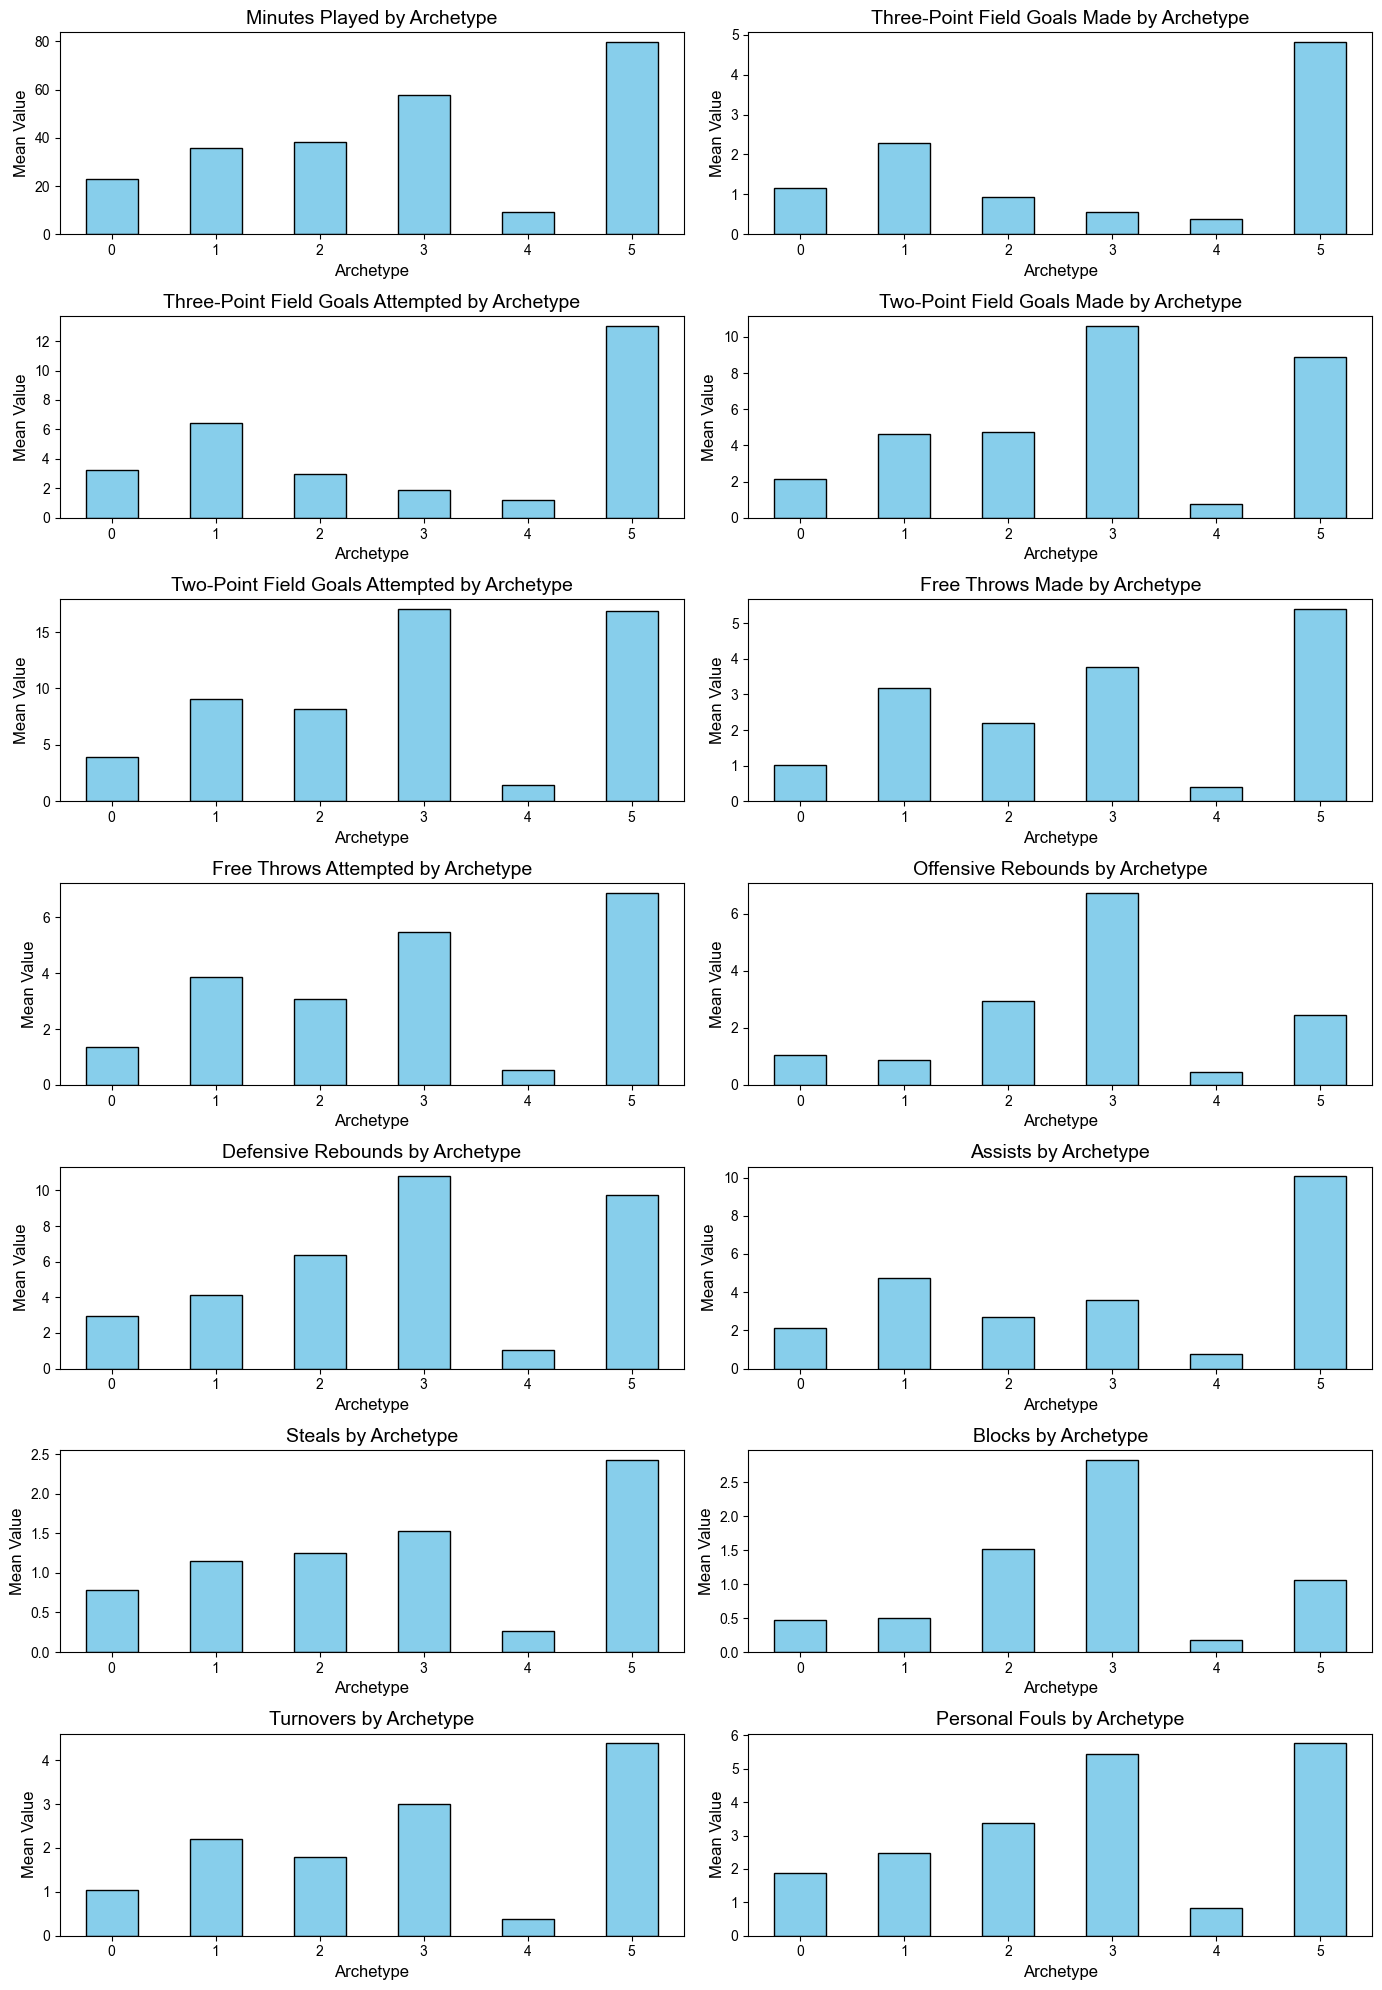

In [84]:
# Grouping by 'Cluster' and calculating the mean for each feature
cluster_stats = aggregated_df.groupby('Archetype').agg({
    #'Age': ['mean', 'std'],
    #'Games Played': ['mean', 'std'],
    'Minutes Played': ['mean', 'std'],
    'Three-Point Field Goals Made': ['mean', 'std'],
    'Three-Point Field Goals Attempted': ['mean', 'std'],
    'Two-Point Field Goals Made': ['mean', 'std'],
    'Two-Point Field Goals Attempted': ['mean', 'std'],
    'Free Throws Made': ['mean', 'std'],
    'Free Throws Attempted': ['mean', 'std'],
    'Offensive Rebounds': ['mean', 'std'],
    'Defensive Rebounds': ['mean', 'std'],
    'Assists': ['mean', 'std'],
    'Steals': ['mean', 'std'],
    'Blocks': ['mean', 'std'],
    'Turnovers': ['mean', 'std'],
    'Personal Fouls': ['mean', 'std']
    #'Points': ['mean', 'std']
})
display(cluster_stats)

# Flatten the multi-level column names for easier access
cluster_stats.columns = ['_'.join(col).strip() for col in cluster_stats.columns.values]

# List of features to plot
features = ['Minutes Played', 'Three-Point Field Goals Made', 'Three-Point Field Goals Attempted',
            'Two-Point Field Goals Made', 'Two-Point Field Goals Attempted', 'Free Throws Made', 'Free Throws Attempted', 'Offensive Rebounds', 
            'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 
            'Personal Fouls']

# Set up the figure for the bar plots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 20))  # 7 rows, 2 columns of bar charts
axes = axes.flatten()

# Loop over the features and plot the bar chart for each
for i, feature in enumerate(features):
    # Plot the mean for each cluster
    cluster_stats[f'{feature}_mean'].plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    
    # Add title and labels
    axes[i].set_title(f'{feature} by Archetype', fontsize=14)
    axes[i].set_xlabel('Archetype', fontsize=12)
    axes[i].set_ylabel('Mean Value', fontsize=12)
    axes[i].set_xticklabels(cluster_stats.index, rotation=0)

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

Index(['Minutes Played_mean', 'Minutes Played_std',
       'Three-Point Field Goals Made_mean', 'Three-Point Field Goals Made_std',
       'Three-Point Field Goals Attempted_mean',
       'Three-Point Field Goals Attempted_std',
       'Two-Point Field Goals Made_mean', 'Two-Point Field Goals Made_std',
       'Two-Point Field Goals Attempted_mean',
       'Two-Point Field Goals Attempted_std', 'Free Throws Made_mean',
       'Free Throws Made_std', 'Free Throws Attempted_mean',
       'Free Throws Attempted_std', 'Offensive Rebounds_mean',
       'Offensive Rebounds_std', 'Defensive Rebounds_mean',
       'Defensive Rebounds_std', 'Assists_mean', 'Assists_std', 'Steals_mean',
       'Steals_std', 'Blocks_mean', 'Blocks_std', 'Turnovers_mean',
       'Turnovers_std', 'Personal Fouls_mean', 'Personal Fouls_std'],
      dtype='object')


IndexError: index 0 is out of bounds for axis 0 with size 0

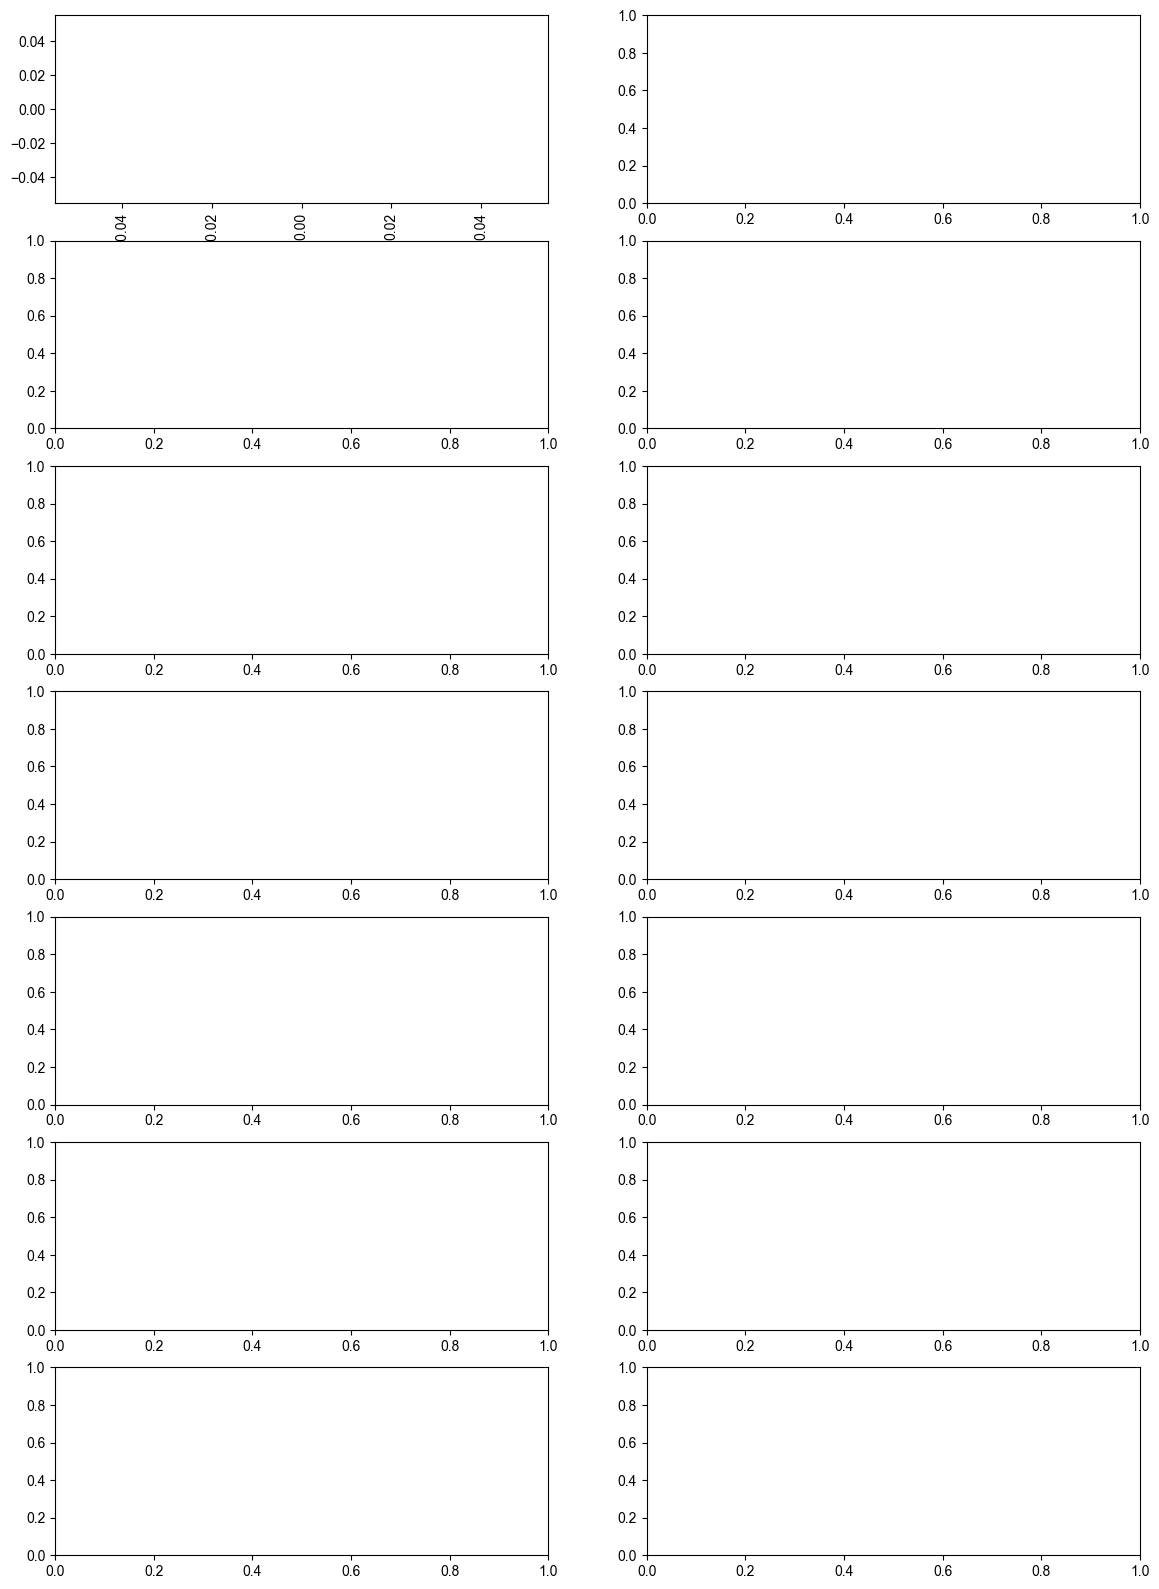

In [85]:
# Grouping by 'Archetype' and calculating the mean and standard deviation for each feature
cluster_stats = aggregated_df.groupby('Archetype').agg({
    'Minutes Played': ['mean', 'std'],
    'Three-Point Field Goals Made': ['mean', 'std'],
    'Three-Point Field Goals Attempted': ['mean', 'std'],
    'Two-Point Field Goals Made': ['mean', 'std'],
    'Two-Point Field Goals Attempted': ['mean', 'std'],
    'Free Throws Made': ['mean', 'std'],
    'Free Throws Attempted': ['mean', 'std'],
    'Offensive Rebounds': ['mean', 'std'],
    'Defensive Rebounds': ['mean', 'std'],
    'Assists': ['mean', 'std'],
    'Steals': ['mean', 'std'],
    'Blocks': ['mean', 'std'],
    'Turnovers': ['mean', 'std'],
    'Personal Fouls': ['mean', 'std']
})

# Flatten the multi-level column names for easier access
cluster_stats.columns = ['_'.join(col).strip() for col in cluster_stats.columns.values]

# Filter to only include archetypes 3, 4, and 5
cluster_stats = cluster_stats.loc[cluster_stats.index.isin([3, 4, 5])]

# Check the structure of the columns to make sure we can access them
print(cluster_stats.columns)

# List of features to plot
features = ['Minutes Played', 'Three-Point Field Goals Made', 'Three-Point Field Goals Attempted',
            'Two-Point Field Goals Made', 'Two-Point Field Goals Attempted', 'Free Throws Made', 
            'Free Throws Attempted', 'Offensive Rebounds', 'Defensive Rebounds', 'Assists', 
            'Steals', 'Blocks', 'Turnovers', 'Personal Fouls']

# Set up the figure for the bar plots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 20)) 
axes = axes.flatten()

# Loop over the features and plot the bar chart for each
for i, feature in enumerate(features):
    mean_column = f'{feature}_mean'
    
    # Ensure that the correct column is being accessed
    if mean_column in cluster_stats.columns:
        # Plot the mean for each archetype
        cluster_stats[mean_column].plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')

        # Add title and labels
        axes[i].set_title(f'{feature} by Archetype', fontsize=14)
        axes[i].set_xlabel('Archetype', fontsize=12)
        axes[i].set_ylabel('Mean Value', fontsize=12)
        axes[i].set_xticklabels(cluster_stats.index, rotation=0)
    else:
        print(f"Warning: {mean_column} not found in columns")

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train a Random Forest to predict the cluster labels
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(scaled_df, kmeans.labels_)

# Get feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame to display the features and their importance
importance_df = pd.DataFrame({
    'Feature': scaled_df.columns,  # Use feature names from scaled_df
    'Importance': feature_importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(importance_df)

                              Feature  Importance
0                      Minutes Played    0.199852
8                  Defensive Rebounds    0.106544
12                          Turnovers    0.097330
4     Two-Point Field Goals Attempted    0.092484
3          Two-Point Field Goals Made    0.068759
13                     Personal Fouls    0.068584
10                             Steals    0.066130
5                    Free Throws Made    0.061154
7                  Offensive Rebounds    0.050268
6               Free Throws Attempted    0.042713
9                             Assists    0.038505
2   Three-Point Field Goals Attempted    0.037012
1        Three-Point Field Goals Made    0.035360
11                             Blocks    0.035304


In [24]:
df.head()

,Player Name,Minutes Played,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,Precious Achiuwa,21.9,0.4,1.3,2.8,5.0,0.9,1.5,2.6,4.0,1.3,0.6,0.9,1.1,1.9,7.6
1,Precious Achiuwa,17.5,0.5,1.9,2.6,4.9,1.0,1.7,2.0,3.4,1.8,0.6,0.5,1.2,1.6,7.7
2,Precious Achiuwa,24.2,0.3,1.0,2.9,5.1,0.9,1.4,2.9,4.3,1.1,0.6,1.1,1.1,2.1,7.6
4,Ochai Agbaji,21.0,0.8,2.7,1.5,2.8,0.5,0.7,0.9,1.8,1.1,0.6,0.6,0.8,1.5,5.8
5,Ochai Agbaji,19.7,0.9,2.8,1.2,2.1,0.3,0.4,0.7,1.8,0.9,0.5,0.6,0.7,1.3,5.4


In [25]:
scaled_df['Cluster']=labels.astype(str)
scaled_df.head(10)

,Minutes Played,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Cluster
0,-0.691011,0.040834,-0.082433,-0.879341,-0.915121,-0.683583,-0.757126,-0.810758,-0.805380,-0.742394,-0.830807,-0.721892,-0.906154,-0.681623,1
1,-0.898746,-0.687493,-0.631425,-0.595647,-0.649704,-0.620375,-0.655153,-0.711172,-0.846351,-0.742394,-0.830807,-0.721892,-0.810760,-0.970997,1
2,-0.829501,-0.525643,-0.387429,-0.838814,-0.760294,-0.810001,-0.859099,-0.910344,-0.887323,-0.822697,-0.985395,-0.721892,-0.715366,-1.115684,1
3,0.491926,-0.525643,-0.417928,0.984937,0.721618,0.643802,0.976415,1.380134,0.464749,0.462146,0.096724,0.247628,0.238572,0.041813,0
4,-0.385178,-0.040091,-0.143432,-0.474063,-0.450641,-0.430748,-0.502194,-0.711172,-0.682464,-0.220427,-0.367041,-0.721892,-0.429185,-0.175217,1
5,0.272650,0.607310,0.405561,-0.028258,-0.096751,0.074923,0.058658,-0.113656,-0.026914,-0.340881,0.251313,0.441532,-0.238397,1.054623,0
6,-0.419801,-0.282867,-0.509427,-0.230897,-0.317932,-0.430748,-0.451207,-0.213242,-0.559548,-0.501486,-0.057864,-0.527988,-0.429185,-0.464592,1
7,-0.921828,-0.525643,-0.082433,-1.000925,-0.915121,-0.873210,-0.910086,-1.009930,-1.215098,-0.140124,-1.139984,-0.915796,-1.096941,-1.332715,1
8,-0.904516,-0.930269,-0.997420,-0.352480,-0.362168,-0.304330,-0.247261,1.081376,-0.436633,-0.943151,-0.985395,-0.915796,-0.524578,-0.898653,1
9,-1.112252,-0.687493,-0.783923,-0.919869,-0.937239,-0.873210,-0.859099,-0.910344,-0.969267,-0.822697,-1.139984,-0.915796,-0.906154,-1.043341,1


In [26]:
scaled_df = scaled_df.rename(columns={'Cluster': 'Archetype'})
df = scaled_df.copy()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Minutes Played                     545 non-null    float64
 1   Three-Point Field Goals Made       545 non-null    float64
 2   Three-Point Field Goals Attempted  545 non-null    float64
 3   Two-Point Field Goals Made         545 non-null    float64
 4   Two-Point Field Goals Attempted    545 non-null    float64
 5   Free Throws Made                   545 non-null    float64
 6   Free Throws Attempted              545 non-null    float64
 7   Offensive Rebounds                 545 non-null    float64
 8   Defensive Rebounds                 545 non-null    float64
 9   Assists                            545 non-null    float64
 10  Steals                             545 non-null    float64
 11  Blocks                             545 non-null    float64

## Data Splitting

In [28]:
# Extract the feature variables
features = df.drop(columns=['Archetype'], axis=1)

# Extract the target variable 'Churned'
target = df['Archetype']

# Split data: 60% for training, 20% for validation, and 20% for testing
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)

# Further split the remaining 40% into validation (20%) and test (20%) sets
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

# Print the size of each dataset
print('Training Features Size:', features_train.shape)
print()
print('Validation Features Size:', features_valid.shape)
print()
print('Test Features Size:', features_test.shape)

Training Features Size: (327, 14)

Validation Features Size: (109, 14)

Test Features Size: (109, 14)


In [29]:
# Model evaluation function
def model_eval(model, features_train, features_valid, target_train, target_valid):
    
    # Train the model on the training data
    model.fit(features_train, target_train)

    # Generate predictions on the validation set
    predictions = model.predict(features_valid)
    probabilities_test = model.predict_proba(features_valid)
   # probabilities_one_valid = probabilities_test[:, 1]

    # Calculate the AUC-ROC, Accuracy and F1 scores of the predictions
    accuracy = accuracy_score(target_valid, predictions)
    f1 = f1_score(target_valid, predictions, average='weighted')

    # Print out the AUC-ROC, Accuracy and F1 scores
    print("Accuracy:", accuracy)
    print("F1:", f1)
    print(classification_report(target_valid, predictions, zero_division=np.nan))

    return accuracy, f1

## RandomForestClassifier

In [30]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=12345)

# Set up RandomizedSearchCV for tuning the Random Forest model
rf_random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions={'n_estimators': [10, 50, 100, 200], 
                         'max_features': ['sqrt', 'log2'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_split': [2, 5, 10], 
                         'min_samples_leaf': [1, 2, 4]}, 
    n_iter=10,     
    cv=5,                        
    scoring='accuracy',
    n_jobs=-1,                      
    random_state=12345
)

# Fit the RandomizedSearchCV object to the training data
rf_random_search.fit(features_train, target_train)

print("BEST RANDOM FOREST HYPERPARAMETERS:", rf_random_search.best_params_)
print()

# Get the best Random Forest model from the search
tuned_rf_model = rf_random_search.best_estimator_

print("RANDOM FOREST STATS:")
print("--------------------")

# Evaluate the tuned Random Forest model
rf_accuracy, rf_f1 = model_eval(tuned_rf_model, features_train, features_valid, target_train, target_valid)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



BEST RANDOM FOREST HYPERPARAMETERS: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}

RANDOM FOREST STATS:
--------------------
Accuracy: 0.8899082568807339
F1: 0.8900964702026992


ValueError: Got zero_division=nan. Must be one of ["warn", 0, 1]

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Archetype'])
y = df['Archetype']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Feature importance (to see which features were most important for classification)
feature_importance = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
print(feature_importance.sort_values(by='Importance', ascending=False))


Accuracy: 0.963302752293578
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.88      1.00      0.94        23
           2       1.00      0.98      0.99        48
           3       1.00      1.00      1.00         1
           4       1.00      0.60      0.75         5

    accuracy                           0.96       109
   macro avg       0.97      0.91      0.93       109
weighted avg       0.97      0.96      0.96       109

                                   Importance
Points                               0.229598
Minutes Per Game                     0.143362
Field Goals Attempted                0.122329
Field Goals Made                     0.110397
Turnovers                            0.054120
Two-Point Field Goals Attempted      0.049670
Defensive Rebounds                   0.049525
Two-Point Field Goals Made           0.043252
Personal Fouls                       0.036549
Steals                 

## XGBClassifier

In [ ]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=12345)
df['Archetype'] = df['Archetype'].astype(float)
print(df.info())

# Set up RandomizedSearchCV for tuning the XGBoost model
xgb_random_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions={'n_estimators': [50, 100, 200, 300],
                         'max_depth': [3, 5, 7, 10],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'subsample': [0.6, 0.8, 1.0],
                         'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.5, 1],
                         'reg_alpha': [0, 0.1, 0.5, 1],
                         'reg_lambda': [0, 0.1, 0.5, 1]}, 
    n_iter=10,                      
    cv=5,                      
    scoring='accuracy', 
    n_jobs=-1,                     
    random_state=12345,
    error_score='raise'
)

# Fit the RandomizedSearchCV object to the training data
xgb_random_search.fit(features_train, target_train)

print("BEST XGBOOST HYPERPARAMETERS:", xgb_random_search.best_params_)
print()

# Get the best XGBoost model from the search
tuned_xgb_model = xgb_random_search.best_estimator_

print("XGBOOST STATS:")
print("--------------")

# Evaluate the tuned XGBoost model
xgb_accuracy, xgb_f1 = model_eval(tuned_xgb_model, features_train, features_valid, target_train, target_valid)
df['Archetype'] = df['Archetype'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Minutes Per Game                   544 non-null    float64
 1   Field Goals Made                   544 non-null    float64
 2   Field Goals Attempted              544 non-null    float64
 3   Three-Point Field Goals Made       544 non-null    float64
 4   Three-Point Field Goals Attempted  544 non-null    float64
 5   Two-Point Field Goals Made         544 non-null    float64
 6   Two-Point Field Goals Attempted    544 non-null    float64
 7   Free Throws Made                   544 non-null    float64
 8   Free Throws Attempted              544 non-null    float64
 9   Offensive Rebounds                 544 non-null    float64
 10  Defensive Rebounds                 544 non-null    float64
 11  Assists                            544 non-null    float64

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got ['0' '1' '2' '3' '4']